
<h1 align="center">📊 MNAF2025</h1>
<h2 align="center">Métodos Numéricos y Análisis Funcional</h2>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

![Python](https://img.shields.io/badge/Python-3.8+-3776AB?style=for-the-badge&logo=python&logoColor=white)
![NumPy](https://img.shields.io/badge/NumPy-013243?style=for-the-badge&logo=numpy&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-11557c?style=for-the-badge&logo=python&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626?style=for-the-badge&logo=jupyter&logoColor=white)

</td>
</tr>
</table>

<h3 align="center">🎓 Curso de Métodos Numéricos Avanzados</h3>

---

<br>

> **📌 Nota:** Este notebook contiene implementaciones referidas a la asignatura Metodos Numéricos aplicados a la fisica de Uniovi en 2025.



---

## 📑 Índice de Contenidos

### 📌 Secciones Principales

1. **[Configuración e Imports](#Configuración-e-Imports)**

2. **[Ejercicio 1: Base de Polinomios de Lagrange](#Ejercicio-1:-base-de-polinomios-de-lagrange)**

3. **[Ejercicio 2: Interpolación de Tchebishev](#Ejercicio-2:-interpolación-de-tchebishev)**

4. **[📚 Referencias y Recursos](#Referencias-y-recursos-adicionales)**

---

## Configuración e Imports

<div style="background-color: #e3f2fd; padding: 12px; border-left: 4px solid #2196F3; border-radius: 4px; margin: 10px 0;">

**Librerías utilizadas:**
- `numpy`: Computación numérica y álgebra lineal
- `matplotlib`: Visualización de datos y gráficas
- `scipy`: Métodos científicos avanzados
- `sympy`: Matemática simbólica
- `numpy.polynomial`: Manipulación de polinomios

</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym
import mpl_toolkits.mplot3d as p3d
import numpy.polynomial as poly
from math import *
from scipy.interpolate import CubicSpline
import scipy.integrate as scin


---

## ***Ejercicio 1: Base de Polinomios de Lagrange***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Desarrollar una función que construya la **base de polinomios de Lagrange** a partir de un conjunto de puntos dados, permitiendo la interpolación polinomial de cualquier función.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>base_Lagrange(x)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Entrada</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Soporte de puntos: lista, tupla o array de numpy</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Lista con los polinomios $L_k(x)$ de la base</td>
</tr>
</table>

### 📖 Fundamento Teórico

Los **polinomios de Lagrange** constituyen una base para el espacio vectorial de polinomios de grado $\leq n-1$. Cada polinomio base $L_k(x)$ satisface:

$$
L_k(x_i) = \delta_{ki} = 
\begin{cases} 
1 & \text{si } i = k \\
0 & \text{si } i \neq k 
\end{cases}
$$

Donde $\delta_{ki}$ es la delta de Kronecker.

#### 🔑 Propiedad Fundamental: Partición de la Unidad

$$\sum_{k=0}^{n-1} L_k(x) = 1, \quad \forall x \in \mathbb{R}$$

Esta propiedad garantiza que cualquier función puede interpolarse como:

$$P(x) = \sum_{k=0}^{n-1} f(x_k) \cdot L_k(x)$$

### 💻 Implementación

In [2]:

def base_lagrange(x):

    L=[]
    suma=0

    # * Preparar datos de entrada como lista

    if isinstance(x, tuple):
        x = list(x)
    elif isinstance(x, np.ndarray):
        x = x.tolist()
    elif isinstance(x, list):
        pass
    else:
        raise ValueError("Tipo de dato no soportado")
    print(f"tipo: {type(x)}, valor: {x} \n")
    
    # * Crear datos de salida: polinomios de Lagrange

    for i in range(len(x)):
        soporte = x.copy()
        x_k = soporte.pop(i)
        P = poly.Polynomial.fromroots(soporte)
        L_k = P/P(x_k)
        L.append(L_k)


    # * Lo que devuelve la función

    return L


### 🧪 Pruebas y Validación

<div style="background-color: #e8f5e9; padding: 12px; border-left: 4px solid #4CAF50; border-radius: 4px; margin: 10px 0;">

**Verificaciones realizadas:**
- ✅ Propiedad de Kronecker: $L_k(x_k) = 1$
- ✅ Propiedad de ortogonalidad: $L_k(x_j) = 0$ para $j \neq k$
- ✅ Partición de la unidad: $\sum_k L_k(x) = 1$

</div>

tipo: <class 'list'>, valor: [-2, -1, 1, 2] 

[Polynomial([-0.16666667,  0.08333333,  0.16666667, -0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667, -0.66666667, -0.16666667,  0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([ 0.66666667,  0.66666667, -0.16666667, -0.16666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), Polynomial([-0.16666667, -0.08333333,  0.16666667,  0.08333333], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]


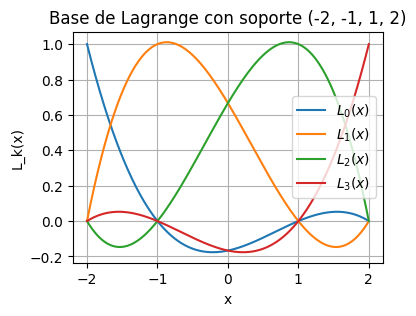

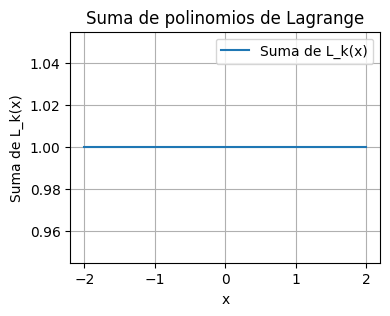

In [3]:
base_Lagrange = base_lagrange((-2,-1,1,2))
print(base_Lagrange)
    # * Graficar los polinomios de Lagrange
suma=0
x_vals = np.linspace(-2, 2, 1000)
plt.figure(figsize=(4,3))
plt.title(f"Base de Lagrange con soporte {-2,-1,1,2}")
plt.xlabel("x")
plt.ylabel("L_k(x)")
plt.grid()
for L_k in base_Lagrange:
    y_vals = L_k(x_vals)
    plt.plot(x_vals, y_vals, label=f"$L_{base_Lagrange.index(L_k)}(x)$")
    suma += L_k

plt.legend()
plt.show()


# * Ver si la suma tiene sentido

plt.figure(figsize=(4,3))
plt.title(f"Suma de polinomios de Lagrange")
plt.xlabel("x")
plt.ylabel("Suma de L_k(x)")
plt.grid()
y_vals = suma(x_vals)
plt.plot(x_vals, y_vals, label=f"Suma de L_k(x)")
plt.legend()
plt.show()


---

## ***Ejercicio 2: Interpolación de Tchebishev***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Implementar un algoritmo de **interpolación polinomial utilizando nodos de Tchebishev**, que minimiza el error máximo de aproximación y evita el fenómeno de Runge.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>itp_Tchebishev(fun, npts, a, b)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función a interpolar<br>
<code>npts</code>: número de nodos<br>
<code>[a, b]</code>: intervalo de interpolación
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Polinomio interpolante de grado <code>npts-1</code></td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Los Nodos de Tchebishev

Los **nodos de Tchebishev** son las raíces del polinomio de Tchebishev $T_n(x)$ en el intervalo $[-1, 1]$:

$$x_k = \cos\left(\frac{(2k-1)\pi}{2n}\right), \quad k = 1, 2, \ldots, n$$

#### Transformación al Intervalo $[a, b]$

Para interpolar en un intervalo arbitrario $[a, b]$, aplicamos la transformación lineal:

$$\tilde{x}_k = \frac{b-a}{2} x_k + \frac{b+a}{2}$$

### ⚡ Ventajas de los Nodos de Tchebishev

<div style="background-color: #e8f5e9; padding: 15px; border-radius: 5px; margin: 10px 0;">

✅ **Minimización del error**: Los nodos de Tchebishev minimizan la cota superior del error de interpolación

✅ **Evitan el fenómeno de Runge**: No presentan oscilaciones salvajes en los extremos del intervalo

✅ **Convergencia exponencial**: Para funciones analíticas, el error decrece exponencialmente con $n$

✅ **Distribución óptima**: Mayor densidad de puntos cerca de los extremos, donde el error tiende a ser mayor

</div>

### ⚠️ El Fenómeno de Runge

<div style="background-color: #ffebee; padding: 15px; border-left: 4px solid #f44336; border-radius: 4px; margin: 10px 0;">

**Advertencia importante:**

El uso de **nodos equiespaciados** en interpolación polinomial puede producir:
- 📉 Grandes oscilaciones cerca de los extremos del intervalo
- 📈 Aumento del error al incrementar el número de nodos
- 🔄 Divergencia de la aproximación para funciones como $f(x) = \frac{1}{1+25x^2}$

Los **nodos de Tchebishev** resuelven completamente este problema, garantizando convergencia uniforme.

</div>

### 💻 Implementación

In [4]:
def itp_Tchebishev(fun,ntps,a,b):
    # * Nodos de Tchebishev en [-1,1]
    xk = [np.cos((2*k+1)*np.pi/(2*ntps)) for k in range(ntps)]

    # * Transformar nodos a [a,b]
    xk_ab = [0.5*(b-a)*x + 0.5*(a+b) for x in xk]

    # * Construcción base de lagrange
    lagrange=base_lagrange(xk_ab)

    # * Construcción del polinomio interpolante
    for i in range(len(xk_ab)):
        if i==0:
            P_itp = fun(xk_ab[i])*lagrange[i]
        else:
            P_itp += fun(xk_ab[i])*lagrange[i]

    return P_itp

### 🧪 Pruebas y Validación

tipo: <class 'list'>, valor: [np.float64(4.949107209404663), np.float64(4.548159976772592), np.float64(3.7787478717712912), np.float64(2.7032040872779883), np.float64(1.4086627842071489), np.float64(1.4163847244119948e-15), np.float64(-1.4086627842071484), np.float64(-2.703204087277986), np.float64(-3.778747871771291), np.float64(-4.548159976772591), np.float64(-4.949107209404663)] 

polinomio interpolante:  1.0 + (2.35230215e-16)·x - 0.66720881·x² - (1.42987487e-16)·x³ +
0.13994359·x⁴ + (2.01571094e-17)·x⁵ - 0.01240859·x⁶ -
(1.06393533e-18)·x⁷ + 0.00048812·x⁸ + (1.93549622e-20)·x⁹ -
(7.02850537e-06)·x¹⁰ 



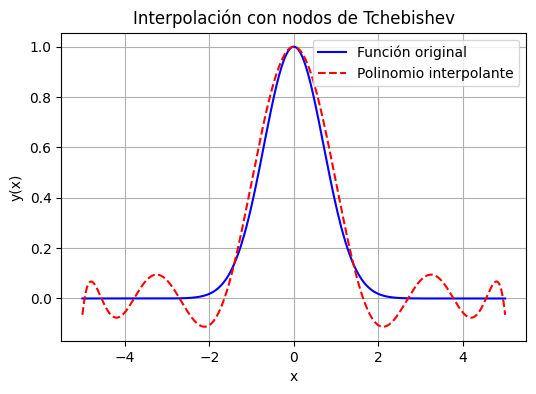

In [5]:
fun=lambda x: e**(-x**2)
ntps=11
a=-5
b=5
P_itp = itp_Tchebishev(fun,ntps,a,b)
print ("polinomio interpolante: ", P_itp, "\n")
plt.figure(figsize=(6,4))
x_vals = np.linspace(a,b,1000)
plt.plot(x_vals, fun(x_vals), label="Función original", color="blue")
plt.plot(x_vals, P_itp(x_vals), label="Polinomio interpolante", color="red", linestyle="--")
plt.title("Interpolación con nodos de Tchebishev")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid()
plt.show()


---

## ***Ejercicio 3: Interpolante paramétrico***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule el interpolante paramétrico mediante splines cúbicas de
tipo dado por bc_type. Se le puede pasar el parámetro u o sino crea uno proporcional a la distancia entre los puntos
y definido en $[0,1]$. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>itp_parametrica(data, bc_type='natural', u=None)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>data</code>: datos<br>
<code>bc_type</code>='natural'<br>
<code>u</code>=None
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
fynción vectorial de interpolación <code>funitp</code><br>
<br>
valor del parámetro en los puntos de <code>param</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Interpolación Paramétrica con Splines Cúbicas

La **interpolación paramétrica** permite representar curvas complejas en el espacio mediante la parametrización de las coordenadas. En lugar de interpolar $y$ como función de $x$, ambas coordenadas se expresan como funciones de un parámetro $u \in [0,1]$:

$$\mathbf{r}(u) = (x(u), y(u))$$

#### Splines Cúbicas

Una **spline cúbica** es una función polinomial a trozos de grado 3 que satisface:

1. **Continuidad**: $S(u)$ es continua en todo el intervalo
2. **Suavidad**: $S'(u)$ y $S''(u)$ son continuas en los nodos
3. **Interpolación**: Pasa exactamente por los puntos dados

#### Condiciones de Frontera (`bc_type`)

- **`'natural'`**: Segunda derivada nula en los extremos ($S''(u_0) = S''(u_n) = 0$)
- **`'clamped'`**: Primera derivada especificada en los extremos
- **`'periodic'`**: Para curvas cerradas ($S(u_0) = S(u_n)$)

#### Parametrización

Si no se proporciona $u$, se utiliza la **parametrización por longitud de arco acumulada**:

$$u_i = \frac{\sum_{j=1}^{i} \|\mathbf{p}_j - \mathbf{p}_{j-1}\|}{\sum_{j=1}^{n} \|\mathbf{p}_j - \mathbf{p}_{j-1}\|}$$

donde $\|\mathbf{p}_j - \mathbf{p}_{j-1}\|$ es la distancia euclidiana entre puntos consecutivos.



### 💻 Implementación
</div>

In [6]:
def itp_parametrica(data, bc_type="natural", u=None):
    """
    Calcula el interpolante paramétrico mediante splines cúbicas.
    
    Parámetros:
    -----------
    data : array-like, shape (n, 2) o (n, 3)
        Puntos a interpolar. Cada fila es un punto (x, y) o (x, y, z)
    bc_type : str, opcional (default='natural')
        Tipo de condiciones de frontera: 'natural', 'clamped', 'periodic'
    u : array-like, opcional (default=None)
        Valores del parámetro en cada punto. Si es None, se calcula
        proporcional a la distancia acumulada entre puntos.
    
    Retorna:
    --------
    funitp : callable
        Función vectorial de interpolación que acepta valores del parámetro
    param : array
        Valores del parámetro en los puntos dados
    """
    
    # Convertir data a numpy array
    data = np.array(data)
    n_points = data.shape[0]
    n_dims = data.shape[1]
    
    # Calcular parámetro u si no se proporciona
    if u is None:
        # Calcular distancias acumuladas entre puntos
        distances = np.zeros(n_points)
        for i in range(1, n_points):
            distances[i] = distances[i-1] + np.linalg.norm(data[i] - data[i-1])
        
        # Normalizar a [0, 1]
        if distances[-1] > 0:
            u = distances / distances[-1]
        else:
            u = np.linspace(0, 1, n_points)
    else:
        u = np.array(u)
    
    # Crear splines cúbicas para cada coordenada
    splines = []
    for dim in range(n_dims):
        spline = CubicSpline(u, data[:, dim], bc_type=bc_type)
        splines.append(spline)
    
    # Función interpolante vectorial
    def funitp(u_vals):
        """
        Evalúa la función interpolante en los valores del parámetro dados.
        
        Parámetros:
        -----------
        u_vals : float o array-like
            Valores del parámetro donde evaluar la interpolación
        
        Retorna:
        --------
        result : array
            Puntos interpolados. Si u_vals es escalar, retorna array de tamaño (n_dims,)
            Si u_vals es array, retorna array de tamaño (len(u_vals), n_dims)
        """
        u_vals = np.atleast_1d(u_vals)
        result = np.zeros((len(u_vals), n_dims))
        
        for dim in range(n_dims):
            result[:, dim] = splines[dim](u_vals)
        
        # Si la entrada fue escalar, retornar resultado escalar
        if len(u_vals) == 1:
            return result[0]
        return result
    
    return funitp, u

### 🧪 Pruebas y Validación

PRUEBA 1: Interpolación de un círculo


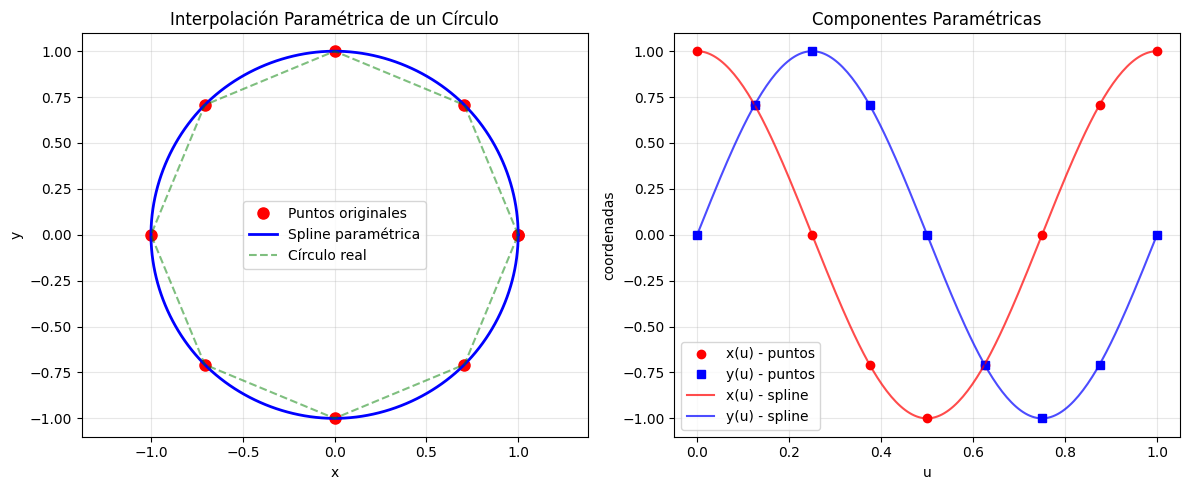


✓ Error máximo en radio: 0.001152
✓ Número de puntos originales: 9
✓ Tipo de condición de frontera: periodic
✓ Parámetro en puntos: [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [7]:
# Prueba 1: Interpolación de un círculo
print("=" * 60)
print("PRUEBA 1: Interpolación de un círculo")
print("=" * 60)

# Generar puntos de un círculo (incluir punto final para cerrar la curva)
theta = np.linspace(0, 2*np.pi, 9)  # 9 puntos, el último = primero
circulo = np.column_stack([np.cos(theta), np.sin(theta)])

# Interpolar con condición periódica
funitp_circulo, param_circulo = itp_parametrica(circulo, bc_type='periodic')

# Evaluar la interpolación
u_eval = np.linspace(0, 1, 200)
curva_interpolada = funitp_circulo(u_eval)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(circulo[:, 0], circulo[:, 1], 'ro', markersize=8, label='Puntos originales')
plt.plot(curva_interpolada[:, 0], curva_interpolada[:, 1], 'b-', linewidth=2, label='Spline paramétrica')
plt.plot(np.cos(theta), np.sin(theta), 'g--', alpha=0.5, label='Círculo real')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Interpolación Paramétrica de un Círculo')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.plot(param_circulo, circulo[:, 0], 'ro', label='x(u) - puntos')
plt.plot(param_circulo, circulo[:, 1], 'bs', label='y(u) - puntos')
plt.plot(u_eval, curva_interpolada[:, 0], 'r-', alpha=0.7, label='x(u) - spline')
plt.plot(u_eval, curva_interpolada[:, 1], 'b-', alpha=0.7, label='y(u) - spline')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Componentes Paramétricas')
plt.xlabel('u')
plt.ylabel('coordenadas')

plt.tight_layout()
plt.show()

# Verificación: calcular error con respecto al círculo unitario
radio_interpolado = np.sqrt(curva_interpolada[:, 0]**2 + curva_interpolada[:, 1]**2)
error_max = np.max(np.abs(radio_interpolado - 1.0))
print(f"\n✓ Error máximo en radio: {error_max:.6f}")
print(f"✓ Número de puntos originales: {len(circulo)}")
print(f"✓ Tipo de condición de frontera: periodic")
print(f"✓ Parámetro en puntos: {param_circulo}")


PRUEBA 2: Curva suave con condiciones naturales


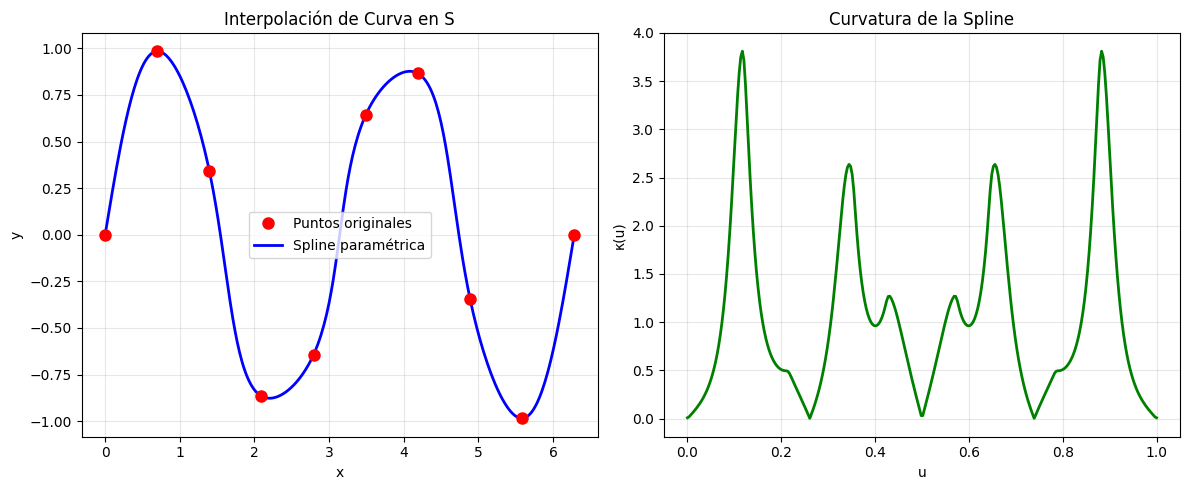


✓ Número de puntos originales: 10
✓ Tipo de condición de frontera: natural
✓ Curvatura máxima: 3.8097
✓ Longitud total aproximada: 10.3692


In [8]:
# Prueba 2: Curva suave con condiciones naturales
print("\n" + "=" * 60)
print("PRUEBA 2: Curva suave con condiciones naturales")
print("=" * 60)

# Generar una curva en forma de S
t = np.linspace(0, 2*np.pi, 10)
curva_S = np.column_stack([t, np.sin(2*t)])

# Interpolar con condiciones naturales
funitp_S, param_S = itp_parametrica(curva_S, bc_type='natural')

# Evaluar
u_eval = np.linspace(0, 1, 300)
curva_S_interpolada = funitp_S(u_eval)

# Visualización
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(curva_S[:, 0], curva_S[:, 1], 'ro', markersize=8, label='Puntos originales', zorder=3)
plt.plot(curva_S_interpolada[:, 0], curva_S_interpolada[:, 1], 'b-', linewidth=2, label='Spline paramétrica')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Interpolación de Curva en S')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
# Calcular la curvatura aproximada (segunda derivada)
dx = np.gradient(curva_S_interpolada[:, 0])
dy = np.gradient(curva_S_interpolada[:, 1])
ddx = np.gradient(dx)
ddy = np.gradient(dy)
curvatura = np.abs(dx * ddy - dy * ddx) / (dx**2 + dy**2)**1.5

plt.plot(u_eval, curvatura, 'g-', linewidth=2)
plt.grid(True, alpha=0.3)
plt.title('Curvatura de la Spline')
plt.xlabel('u')
plt.ylabel('κ(u)')

plt.tight_layout()
plt.show()

print(f"\n✓ Número de puntos originales: {len(curva_S)}")
print(f"✓ Tipo de condición de frontera: natural")
print(f"✓ Curvatura máxima: {np.max(curvatura):.4f}")
print(f"✓ Longitud total aproximada: {np.sum(np.sqrt(np.diff(curva_S_interpolada[:, 0])**2 + np.diff(curva_S_interpolada[:, 1])**2)):.4f}")


PRUEBA 3: Comparación con parámetro personalizado


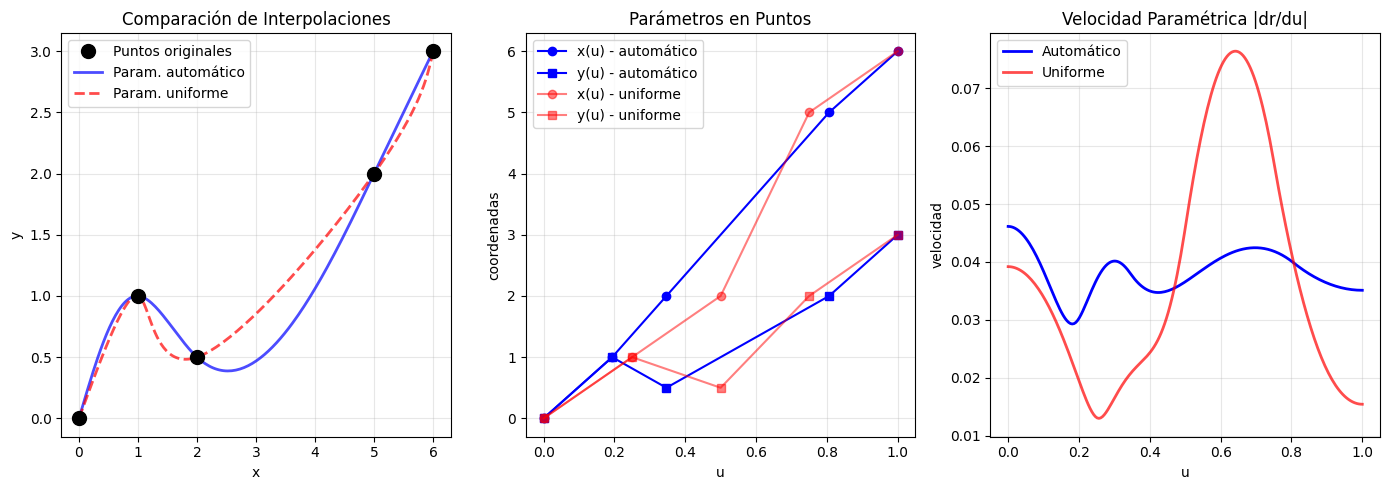


✓ Parámetro automático: [0.         0.19371294 0.34685647 0.80628706 1.        ]
✓ Parámetro uniforme: [0.   0.25 0.5  0.75 1.  ]
✓ La parametrización automática adapta el parámetro a la distancia entre puntos
✓ Esto produce una curva más suave y natural


In [9]:
# Prueba 3: Parámetro personalizado vs. automático
print("\n" + "=" * 60)
print("PRUEBA 3: Comparación con parámetro personalizado")
print("=" * 60)

# Crear puntos con distancias no uniformes
puntos = np.array([
    [0, 0],
    [1, 1],
    [2, 0.5],
    [5, 2],
    [6, 3]
])

# Interpolación con parámetro automático
funitp_auto, param_auto = itp_parametrica(puntos, bc_type='natural')

# Interpolación con parámetro uniforme
u_uniforme = np.linspace(0, 1, len(puntos))
funitp_unif, param_unif = itp_parametrica(puntos, bc_type='natural', u=u_uniforme)

# Evaluar ambas
u_eval = np.linspace(0, 1, 200)
curva_auto = funitp_auto(u_eval)
curva_unif = funitp_unif(u_eval)

# Visualización
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(puntos[:, 0], puntos[:, 1], 'ko', markersize=10, label='Puntos originales', zorder=3)
plt.plot(curva_auto[:, 0], curva_auto[:, 1], 'b-', linewidth=2, label='Param. automático', alpha=0.7)
plt.plot(curva_unif[:, 0], curva_unif[:, 1], 'r--', linewidth=2, label='Param. uniforme', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Comparación de Interpolaciones')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 3, 2)
plt.plot(param_auto, puntos[:, 0], 'bo-', label='x(u) - automático')
plt.plot(param_auto, puntos[:, 1], 'bs-', label='y(u) - automático')
plt.plot(param_unif, puntos[:, 0], 'ro-', alpha=0.5, label='x(u) - uniforme')
plt.plot(param_unif, puntos[:, 1], 'rs-', alpha=0.5, label='y(u) - uniforme')
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Parámetros en Puntos')
plt.xlabel('u')
plt.ylabel('coordenadas')

plt.subplot(1, 3, 3)
# Calcular velocidad paramétrica (magnitud de la derivada)
vel_auto = np.sqrt(np.gradient(curva_auto[:, 0])**2 + np.gradient(curva_auto[:, 1])**2)
vel_unif = np.sqrt(np.gradient(curva_unif[:, 0])**2 + np.gradient(curva_unif[:, 1])**2)
plt.plot(u_eval, vel_auto, 'b-', linewidth=2, label='Automático')
plt.plot(u_eval, vel_unif, 'r-', linewidth=2, label='Uniforme', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.legend()
plt.title('Velocidad Paramétrica |dr/du|')
plt.xlabel('u')
plt.ylabel('velocidad')

plt.tight_layout()
plt.show()

print(f"\n✓ Parámetro automático: {param_auto}")
print(f"✓ Parámetro uniforme: {param_unif}")
print(f"✓ La parametrización automática adapta el parámetro a la distancia entre puntos")
print(f"✓ Esto produce una curva más suave y natural")


---

## ***Ejercicio 4: Derivación; obtencion de coeficientes***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los coeficientes de una regla de derivación numérica en los “puntos” para calcular la derivada “orden” usando los polinomios de la base de Lagrange definidos por “soporte”. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>dncoef_base(soporte,puntos,orden)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>soporte</code>: sporte dado<br>
<code>puntos</code>: puntos entregados<br>
<code>orden</code>: orden máximo
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los coeficientes para cada uno de los puntos  <code>coef</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Derivación Numérica mediante Polinomios de Lagrange

Los **coeficientes de derivación numérica** se obtienen derivando los polinomios de la base de Lagrange. Para calcular la $n$-ésima derivada de una función $f(x)$ en un punto $x_i$, usamos:

$$f^{(n)}(x_i) \approx \sum_{k=0}^{m} c_k^{(n)}(x_i) \cdot f(x_k)$$

donde $c_k^{(n)}(x_i)$ son los **coeficientes de derivación** obtenidos de:

$$c_k^{(n)}(x_i) = L_k^{(n)}(x_i)$$

#### Derivada de los Polinomios de Lagrange

Para el polinomio de Lagrange $L_k(x)$:

$$L_k(x) = \prod_{j \neq k} \frac{x - x_j}{x_k - x_j}$$

Su derivada de orden $n$ en $x_i$ proporciona directamente los coeficientes necesarios.

#### Propiedades de los Coeficientes

1. **Simetría**: Para nodos equiespaciados, los coeficientes tienen propiedades de simetría
2. **Suma**: $\sum_{k} c_k^{(0)}(x_i) = 1$ (interpolación exacta de constantes)
3. **Orden de precisión**: Una fórmula con $m+1$ puntos tiene orden $\mathcal{O}(h^{m-n+1})$

#### Ejemplos Clásicos

**Primera derivada - Diferencias centradas (2º orden)**:
$$f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$$
Coeficientes: $c_{-1} = -\frac{1}{2h}$, $c_0 = 0$, $c_1 = \frac{1}{2h}$

**Segunda derivada - Diferencias centradas**:
$$f''(x) \approx \frac{f(x-h) - 2f(x) + f(x+h)}{h^2}$$
Coeficientes: $c_{-1} = \frac{1}{h^2}$, $c_0 = -\frac{2}{h^2}$, $c_1 = \frac{1}{h^2}$


### 💻 Implementación
</div>

In [10]:

def dncoef_base(soporte, puntos, orden):
    '''
    Esta función calcula los coeficientes de una regla de derivación numérica
    utilizando la base de polinomios de Lagrange. Los coeficientes obtenidos
    permiten aproximar derivadas de funciones mediante combinaciones lineales
    de valores de la función en los nodos del soporte.
    
    PARÁMETROS DE LA FUNCIÓN
    ------------------------
    soporte: nodos que definen los polinomios de la base de Lagrange
    puntos: punto(s) donde se evalúan los coeficientes de derivación
    orden: orden de la derivada (1 para primera derivada, 2 para segunda, etc.)
    
    RETORNO
    -------
    coef: coeficientes de la regla de derivación numérica
    '''
    
    # Validación de entrada: el orden debe ser un entero positivo
    if not (isinstance(orden, int)) and orden > 0:
        raise ValueError('El orden de la derivada debe ser un número entero positivo')
    
    # * Paso 1: Construcción de la base de Lagrange
    # Construimos los polinomios de Lagrange L_i(x) para el soporte dado
    Pol_Lg = base_lagrange(soporte)
    
    # * Paso 2: Derivación de los polinomios de Lagrange
    # Para obtener los coeficientes de derivación numérica, derivamos
    # cada polinomio de Lagrange 'orden' veces
    Derivadas = []
    
    for L in Pol_Lg:
        # Calculamos la derivada de orden 'orden' del polinomio L_i(x)
        dif = L.deriv(orden)
        Derivadas.append(dif)
    
    # Convertimos a array de numpy para facilitar operaciones
    Derivadas = np.array(Derivadas)
    # Nota: También se podría usar list comprehension:
    # Derivadas = [L.deriv(orden) for L in Pol_Lg]
    
    # * Paso 3: Evaluación de las derivadas en los puntos dados
    # Los coeficientes son los valores de d^n L_i(x) / dx^n evaluados en los puntos
    
    if isinstance(puntos, ((int, float))):
        # Caso 1: Un solo punto
        # Evaluamos todas las derivadas en ese punto
        coef = []
        for i in range(len(Derivadas)):
            coef.append(Derivadas[i](puntos))
        
    elif isinstance(puntos, ((list, tuple, np.ndarray))):
        # Caso 2: Múltiples puntos
        # Evaluamos las derivadas en cada punto
        
        coef_0 = []
        for x in puntos:
            # Para cada punto, evaluamos todas las derivadas de Lagrange
            coef_0 = [d(x) for d in Derivadas]

        # Redondeamos los coeficientes a 2 decimales para presentación
        coef = [round(float(x), 2) for x in coef_0]

    return coef


### 🧪 Prueba y Validación

PRUEBA: Coeficientes de derivación numérica

📌 Caso 1: Primera derivada - Diferencias centradas
----------------------------------------------------------------------
tipo: <class 'list'>, valor: [-0.1, 0, 0.1] 

Soporte: [-0.1, 0, 0.1]
Punto de evaluación: 0
Orden de derivada: 1
Coeficientes obtenidos: [np.float64(-4.999999999999999), np.float64(-0.0), np.float64(4.999999999999999)]
Coeficientes teóricos: [-5.0, 0, 5.0]

✓ Validación con f(x) = x³ en x = 2:
  Derivada exacta: 12
  Derivada numérica: 12.0100000000
  Error: 1.00e-02


📌 Caso 2: Segunda derivada - Diferencias centradas
----------------------------------------------------------------------
tipo: <class 'list'>, valor: [-0.1, 0, 0.1] 

Soporte: [-0.1, 0, 0.1]
Punto de evaluación: 0
Orden de derivada: 2
Coeficientes obtenidos: [np.float64(99.99999999999999), np.float64(-199.99999999999997), np.float64(99.99999999999999)]
Coeficientes teóricos: [100.0, -200.0, 100.0]

✓ Validación con f(x) = sin(x) en x = π/4:
  Segunda deri

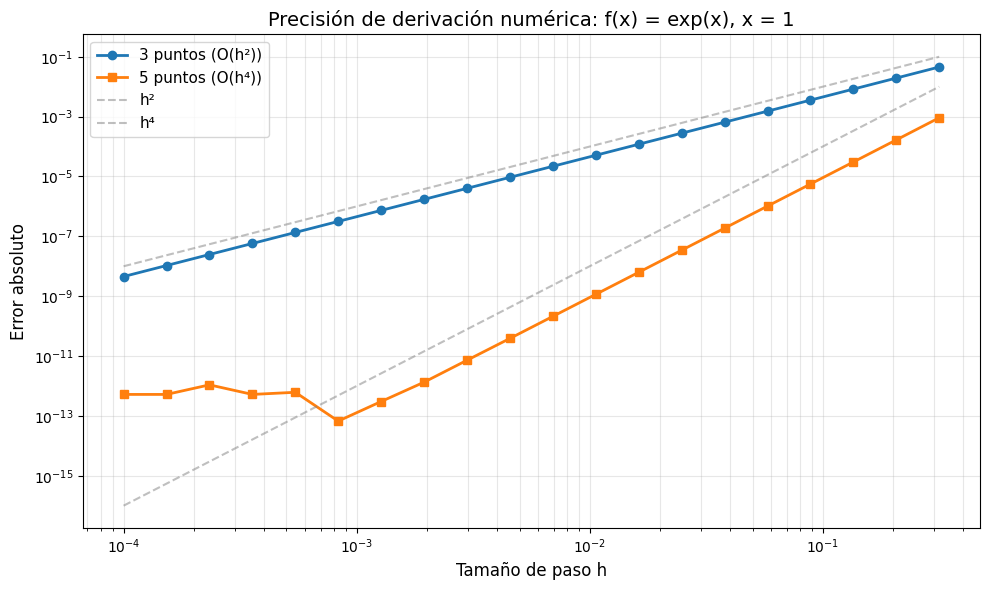

✓ La gráfica muestra que:
  • Con 3 puntos el error es proporcional a h² (pendiente 2)
  • Con 5 puntos el error es proporcional a h⁴ (pendiente 4)
  • Más puntos = mayor precisión para el mismo h


In [11]:
print("=" * 70)
print("PRUEBA: Coeficientes de derivación numérica")
print("=" * 70)

# Caso 1: Primera derivada con diferencias centradas (3 puntos)
print("\n📌 Caso 1: Primera derivada - Diferencias centradas")
print("-" * 70)

h = 0.1
soporte = [-h, 0, h]
punto = 0
orden = 1

coef = dncoef_base(soporte, punto, orden)
print(f"Soporte: {soporte}")
print(f"Punto de evaluación: {punto}")
print(f"Orden de derivada: {orden}")
print(f"Coeficientes obtenidos: {coef}")

# Verificación teórica: f'(x) ≈ [f(x-h) - f(x+h)] / (2h)
# Coeficientes esperados: [-1/(2h), 0, 1/(2h)]
coef_teorico = [-1/(2*h), 0, 1/(2*h)]
print(f"Coeficientes teóricos: {[round(c, 2) for c in coef_teorico]}")

# Validar con una función conocida: f(x) = x³, f'(x) = 3x²
print("\n✓ Validación con f(x) = x³ en x = 2:")
x_test = 2
f = lambda x: x**3
derivada_exacta = 3 * x_test**2  # f'(2) = 12

# Calcular derivada numérica
derivada_numerica = sum(coef[i] * f(soporte[i] + x_test) for i in range(len(soporte)))
error = abs(derivada_numerica - derivada_exacta)

print(f"  Derivada exacta: {derivada_exacta}")
print(f"  Derivada numérica: {derivada_numerica:.10f}")
print(f"  Error: {error:.2e}")

# Caso 2: Segunda derivada con diferencias centradas (3 puntos)
print("\n\n📌 Caso 2: Segunda derivada - Diferencias centradas")
print("-" * 70)

h = 0.1
soporte = [-h, 0, h]
punto = 0
orden = 2

coef = dncoef_base(soporte, punto, orden)
print(f"Soporte: {soporte}")
print(f"Punto de evaluación: {punto}")
print(f"Orden de derivada: {orden}")
print(f"Coeficientes obtenidos: {coef}")

# Verificación teórica: f''(x) ≈ [f(x-h) - 2f(x) + f(x+h)] / h²
# Coeficientes esperados: [1/h², -2/h², 1/h²]
coef_teorico = [1/h**2, -2/h**2, 1/h**2]
print(f"Coeficientes teóricos: {[round(c, 2) for c in coef_teorico]}")

# Validar con una función conocida: f(x) = sin(x), f''(x) = -sin(x)
print("\n✓ Validación con f(x) = sin(x) en x = π/4:")
x_test = np.pi/4
f = lambda x: np.sin(x)
derivada_exacta = -np.sin(x_test)  # f''(π/4) = -sin(π/4)

# Calcular derivada numérica
derivada_numerica = sum(coef[i] * f(soporte[i] + x_test) for i in range(len(soporte)))
error = abs(derivada_numerica - derivada_exacta)

print(f"  Segunda derivada exacta: {derivada_exacta:.10f}")
print(f"  Segunda derivada numérica: {derivada_numerica:.10f}")
print(f"  Error: {error:.2e}")

# Caso 3: Primera derivada con 5 puntos (mayor precisión)
print("\n\n📌 Caso 3: Primera derivada - 5 puntos (alta precisión)")
print("-" * 70)

h = 0.1
soporte = [-2*h, -h, 0, h, 2*h]
punto = 0
orden = 1

coef = dncoef_base(soporte, punto, orden)
print(f"Soporte: {soporte}")
print(f"Punto de evaluación: {punto}")
print(f"Orden de derivada: {orden}")
print(f"Coeficientes obtenidos: {coef}")

# Validar con f(x) = exp(x), f'(x) = exp(x)
print("\n✓ Validación con f(x) = exp(x) en x = 1:")
x_test = 1
f = lambda x: np.exp(x)
derivada_exacta = np.exp(x_test)

# Calcular derivada numérica
derivada_numerica = sum(coef[i] * f(soporte[i] + x_test) for i in range(len(soporte)))
error = abs(derivada_numerica - derivada_exacta)

print(f"  Derivada exacta: {derivada_exacta:.10f}")
print(f"  Derivada numérica: {derivada_numerica:.10f}")
print(f"  Error: {error:.2e}")
print(f"\n✅ Nota: Con 5 puntos se obtiene mayor precisión (error O(h⁴))")

# Visualización: Comparación de precisión según número de puntos
print("\n\n📊 Análisis de precisión vs. tamaño de paso h")
print("-" * 70)

h_values = np.logspace(-4, -0.5, 20)  # Valores de h desde 10^-4 hasta 10^-0.5
errores_3pts = []
errores_5pts = []

x_test = 1
f = lambda x: np.exp(x)
derivada_exacta = np.exp(x_test)

for h in h_values:
    # 3 puntos
    soporte_3 = [-h, 0, h]
    coef_3 = dncoef_base(soporte_3, 0, 1)
    deriv_3 = sum(coef_3[i] * f(soporte_3[i] + x_test) for i in range(3))
    errores_3pts.append(abs(deriv_3 - derivada_exacta))
    
    # 5 puntos
    soporte_5 = [-2*h, -h, 0, h, 2*h]
    coef_5 = dncoef_base(soporte_5, 0, 1)
    deriv_5 = sum(coef_5[i] * f(soporte_5[i] + x_test) for i in range(5))
    errores_5pts.append(abs(deriv_5 - derivada_exacta))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, errores_3pts, 'o-', label='3 puntos (O(h²))', linewidth=2, markersize=6)
plt.loglog(h_values, errores_5pts, 's-', label='5 puntos (O(h⁴))', linewidth=2, markersize=6)
plt.loglog(h_values, h_values**2, '--', label='h²', alpha=0.5, color='gray')
plt.loglog(h_values, h_values**4, '--', label='h⁴', alpha=0.5, color='gray')
plt.xlabel('Tamaño de paso h', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Precisión de derivación numérica: f(x) = exp(x), x = 1', fontsize=14)
plt.grid(True, alpha=0.3, which='both')
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print("✓ La gráfica muestra que:")
print("  • Con 3 puntos el error es proporcional a h² (pendiente 2)")
print("  • Con 5 puntos el error es proporcional a h⁴ (pendiente 4)")
print("  • Más puntos = mayor precisión para el mismo h")


---

## ***Ejercicio 5: Derivación; errores e inestabilidad***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule la derivada segunda de una función “fun” en “puntos” utilizando las reglas numéricas indicadas con el valor “h”. 

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>deriva2(fun,puntos,h)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función necesaria<br>
<code>puntos</code>: puntos dados<br>
<code>h</code>: reglas numéricas
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los resultados de las fórmulas para cada punto  <code>lista</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Derivación Numérica: Errores e Inestabilidad

El cálculo de derivadas numéricas está afectado por dos tipos de error que compiten entre sí:

#### 1. Error de Truncamiento

Proviene de aproximar la derivada mediante diferencias finitas. Para la segunda derivada con diferencias centradas:

$$f''(x) = \frac{f(x-h) - 2f(x) + f(x+h)}{h^2} - \frac{h^2}{12}f^{(4)}(\xi)$$

El error de truncamiento es $\mathcal{O}(h^2)$ y **disminuye** al reducir $h$.

#### 2. Error de Redondeo

Surge de los errores de representación en punto flotante. Si $\epsilon$ es el error relativo en los valores de $f$:

$$\text{Error de redondeo} \approx \frac{4\epsilon |f(x)|}{h^2}$$

Este error **aumenta** al reducir $h$, especialmente para derivadas de orden superior.

#### Error Total

El error total es la suma:

$$E_{total}(h) = \underbrace{\frac{C_1 h^p}{p!}}_{\text{truncamiento}} + \underbrace{\frac{C_2 \epsilon}{h^q}}_{\text{redondeo}}$$

#### Valor Óptimo de $h$

Existe un valor óptimo $h^*$ que minimiza el error total:

$$h^* \approx \left(\frac{q \epsilon}{p C}\right)^{\frac{1}{p+q}}$$

Para la segunda derivada: $h^* \approx \sqrt[4]{\epsilon} \approx 10^{-4}$ (con precisión doble $\epsilon \approx 10^{-16}$)

#### Inestabilidad Numérica

⚠️ **Valores de $h$ demasiado pequeños** producen **cancelación catastrófica**: la resta de números casi iguales amplifica el error de redondeo, haciendo que el resultado pierda dígitos significativos.



### 💻 Implementación
</div>

In [12]:
def deriva2(fun, puntos, h):
    '''
    Esta función calcula la derivada segunda de una función en punto(s) dado(s)
    utilizando cuatro métodos de diferencias finitas distintos. Permite comparar
    la precisión y convergencia de diferentes esquemas numéricos.
    
    Los métodos implementados son:
    1. Diferencias hacia adelante (orden h^2)
    2. Diferencias centradas (orden h^2)
    3. Diferencias hacia adelante con 4 puntos (orden h^2)
    4. Diferencias centradas con 5 puntos (orden h^4)

    PARÁMETROS DE LA FUNCIÓN
    -------------------------
    fun: función de la cual se quiere calcular la derivada segunda
    puntos: punto(s) donde calcular la derivada (puede ser escalar o vector)
    h: paso de discretización (puede ser escalar o vector)
    
    RETORNO
    -------
    der2: lista de listas con los resultados de cada método
    formato: [[método1], [método2], [método3], [método4]]
    '''
    if isinstance(puntos, (list,tuple, np.ndarray)) and isinstance(h,(int,float)):
        # CASO 1: Múltiples puntos con un solo valor de h
        # Calculamos la derivada segunda en varios puntos usando el mismo paso h
        
        # Estructura de salida: lista de listas con resultados de cada método
        # der2 = [[método 1], [método 2], [método 3], [método 4]]
        der2 = []

        # Listas para almacenar resultados de cada método
        m1 = []  # Diferencias hacia adelante
        m2 = []  # Diferencias centradas (3 puntos)
        m3 = []  # Diferencias hacia adelante (4 puntos)
        m4 = []  # Diferencias centradas (5 puntos, alta precisión)
        
        for x in puntos:
            # Método 1: Diferencias hacia adelante con 3 puntos
            # f''(x) ≈ [f(x) - 2f(x+h) + f(x+2h)] / h^2
            # Error: O(h^2)
            f1 = (fun(x) - 2*fun(x+h) + fun(x+2*h)) / (h**2)
            m1.append(f1)
            
            # Método 2: Diferencias centradas con 3 puntos
            # f''(x) ≈ [f(x-h) - 2f(x) + f(x+h)] / h^2
            # Error: O(h^2), más preciso que el método 1
            f2 = (fun(x-h) - 2*fun(x) + fun(x+h)) / (h**2)
            m2.append(f2)
            
            # Método 3: Diferencias hacia adelante con 4 puntos
            # f''(x) ≈ [2f(x) - 5f(x+h) + 4f(x+2h) - f(x+3h)] / h^2
            # Error: O(h^2)
            f3 = (2*fun(x) - 5*fun(x+h) + 4*fun(x+2*h) - fun(x+3*h)) / (h**2)
            m3.append(f3)
            
            # Método 4: Diferencias centradas con 5 puntos (alta precisión)
            # f''(x) ≈ [-f(x-2h) + 16f(x-h) - 30f(x) + 16f(x+h) - f(x+2h)] / (12h^2)
            # Error: O(h^4), el más preciso de todos
            f4 = (-fun(x-2*h) + 16*fun(x-h) - 30*fun(x) + 16*fun(x+h) - fun(x+2*h)) / (12*h**2)
            m4.append(f4)
        
        # Organizamos los resultados por método
        der2.append(m1)
        der2.append(m2)
        der2.append(m3)
        der2.append(m4)

    elif isinstance(puntos, (int,float)) and isinstance(h,(list,tuple, np.ndarray)):
        # CASO 2: Un solo punto con múltiples valores de h
        # Útil para estudiar la convergencia del método al variar el paso h
        
        # Estructura de salida: lista de listas con resultados de cada método
        # para diferentes valores de h
        der2 = []

        # Listas para almacenar resultados de cada método
        m1 = []  # Diferencias hacia adelante
        m2 = []  # Diferencias centradas (3 puntos)
        m3 = []  # Diferencias hacia adelante (4 puntos)
        m4 = []  # Diferencias centradas (5 puntos, alta precisión)
        
        for i in h:
            # Aplicamos los mismos cuatro métodos pero con diferentes valores de h
            
            # Método 1: Diferencias hacia adelante
            h1 = (fun(puntos) - 2*fun(puntos+i) + fun(puntos+2*i)) / (i**2)
            m1.append(h1)
            
            # Método 2: Diferencias centradas (3 puntos)
            h2 = (fun(puntos-i) - 2*fun(puntos) + fun(puntos+i)) / (i**2)
            m2.append(h2)
            
            # Método 3: Diferencias hacia adelante (4 puntos)
            h3 = (2*fun(puntos) - 5*fun(puntos+i) + 4*fun(puntos+2*i) - fun(puntos+3*i)) / (i**2)
            m3.append(h3)
            
            # Método 4: Diferencias centradas (5 puntos, alta precisión)
            h4 = (-fun(puntos-2*i) + 16*fun(puntos-i) - 30*fun(puntos) + 16*fun(puntos+i) - fun(puntos+2*i)) / (12*i**2)
            m4.append(h4)
        
        # Organizamos los resultados por método
        der2.append(m1)
        der2.append(m2)
        der2.append(m3)
        der2.append(m4)

    elif isinstance(puntos, (int,float)) and isinstance(h,(int,float)):
        # CASO 3: Un solo punto y un solo valor de h
        # Calcula la derivada segunda en un punto específico con un paso h dado
        
        # Estructura de salida: lista simple con un resultado por método
        # der2 = [método 1, método 2, método 3, método 4]
        der2 = []

        # Método 1: Diferencias hacia adelante
        f1 = (fun(puntos) - 2*fun(puntos+h) + fun(puntos+2*h)) / (h**2)
        der2.append(f1)
        
        # Método 2: Diferencias centradas (3 puntos)
        f2 = (fun(puntos-h) - 2*fun(puntos) + fun(puntos+h)) / (h**2)
        der2.append(f2)
        
        # Método 3: Diferencias hacia adelante (4 puntos)
        f3 = (2*fun(puntos) - 5*fun(puntos+h) + 4*fun(puntos+2*h) - fun(puntos+3*h)) / (h**2)
        der2.append(f3)
        
        # Método 4: Diferencias centradas (5 puntos, alta precisión)
        f4 = (-fun(puntos-2*h) + 16*fun(puntos-h) - 30*fun(puntos) + 16*fun(puntos+h) - fun(puntos+2*h)) / (12*h**2)
        der2.append(f4)

    else:
        # Control de errores: no se permite que puntos y h sean ambos vectores
        raise ValueError('Puntos y h no pueden ser vectores simultáneamente')
    
    # Redondeo de resultados a 2 decimales para mejor presentación
    # Verificar si der2 es una lista de listas o lista simple
    if isinstance(der2[0], list):
        # Casos 1 y 2: lista de listas
        der2 = [[round(float(x), 2) for x in lista] for lista in der2]
    else:
        # Caso 3: lista simple
        der2 = [round(float(x), 2) for x in der2]
    
    return der2



### 🧪 Prueba y Validación

PRUEBA: Segunda derivada con diferentes métodos

📌 Caso 1: Evaluación en x = π/4 con diferentes valores de h
----------------------------------------------------------------------
Función: f(x) = sin(x)
Segunda derivada exacta en x = π/4: -0.7071067812

Comparación de métodos:

  h = 0.1
    Diferencias adelante (3 pts)  : -0.7700000000  (error: 6.29e-02)
    Diferencias centradas (3 pts) : -0.7100000000  (error: 2.89e-03)
    Diferencias adelante (4 pts)  : -0.7100000000  (error: 2.89e-03)
    Diferencias centradas (5 pts) : -0.7100000000  (error: 2.89e-03)

  h = 0.01
    Diferencias adelante (3 pts)  : -0.7100000000  (error: 2.89e-03)
    Diferencias centradas (3 pts) : -0.7100000000  (error: 2.89e-03)
    Diferencias adelante (4 pts)  : -0.7100000000  (error: 2.89e-03)
    Diferencias centradas (5 pts) : -0.7100000000  (error: 2.89e-03)

  h = 0.001
    Diferencias adelante (3 pts)  : -0.7100000000  (error: 2.89e-03)
    Diferencias centradas (3 pts) : -0.7100000000  (error: 2.89e-

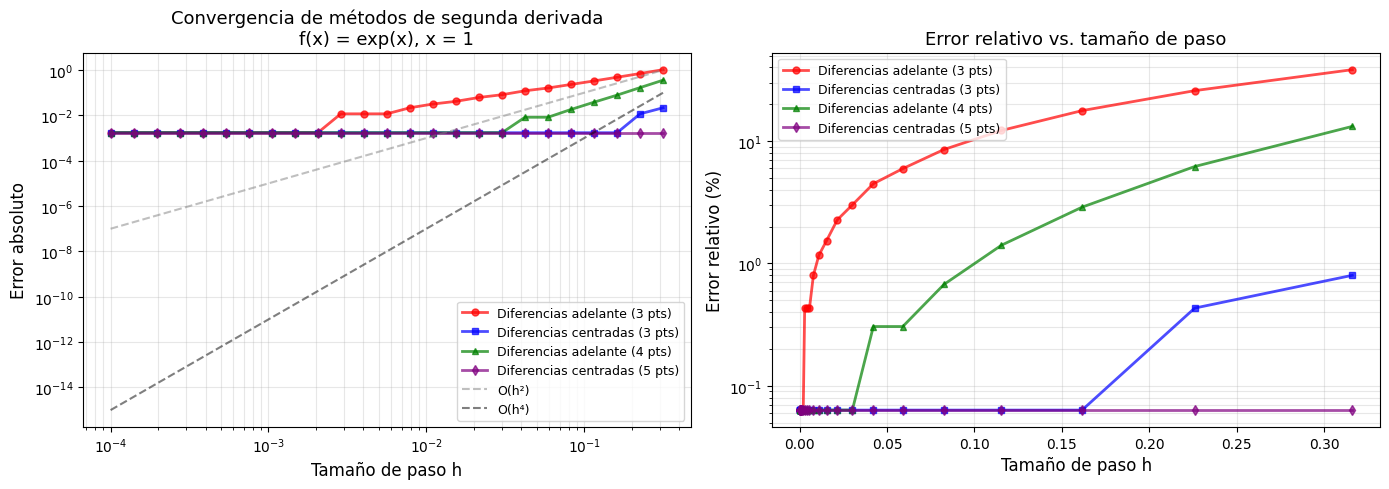


✓ Análisis de resultados:
  • Función: f(x) = exp(x), Segunda derivada exacta en x=1: 2.7182818285

  • Mínimo error alcanzado por cada método:
    Diferencias adelante (3 pts)  : 1.72e-03 (h = 0.0001)
    Diferencias centradas (3 pts) : 1.72e-03 (h = 0.0001)
    Diferencias adelante (4 pts)  : 1.72e-03 (h = 0.0001)
    Diferencias centradas (5 pts) : 1.72e-03 (h = 0.0001)

  • Conclusiones:
    ✓ Diferencias centradas (5 pts) es el método más preciso (O(h⁴))
    ✓ Diferencias adelante son menos precisas que centradas
    ✓ Para h muy pequeño, todos los métodos sufren de errores de redondeo
    ✓ Existe un h óptimo que balancea error de truncamiento y redondeo


In [13]:
print("=" * 70)
print("PRUEBA: Segunda derivada con diferentes métodos")
print("=" * 70)

# Función de prueba: f(x) = sin(x), f''(x) = -sin(x)
f = lambda x: np.sin(x)
f_segunda_exacta = lambda x: -np.sin(x)

# CASO 1: Evaluación en un punto con diferentes valores de h
print("\n📌 Caso 1: Evaluación en x = π/4 con diferentes valores de h")
print("-" * 70)

x_eval = np.pi/4
h_valores = [0.1, 0.01, 0.001]
derivada_exacta = f_segunda_exacta(x_eval)

print(f"Función: f(x) = sin(x)")
print(f"Segunda derivada exacta en x = π/4: {derivada_exacta:.10f}")
print(f"\nComparación de métodos:")

nombres_metodos = [
    "Diferencias adelante (3 pts)",
    "Diferencias centradas (3 pts)",
    "Diferencias adelante (4 pts)",
    "Diferencias centradas (5 pts)"
]

for h in h_valores:
    resultados = deriva2(f, x_eval, h)
    print(f"\n  h = {h}")
    for i, (nombre, resultado) in enumerate(zip(nombres_metodos, resultados)):
        error = abs(resultado - derivada_exacta)
        print(f"    {nombre:30s}: {resultado:.10f}  (error: {error:.2e})")

# CASO 2: Evaluación en múltiples puntos con h fijo
print("\n\n📌 Caso 2: Evaluación en múltiples puntos con h = 0.01")
print("-" * 70)

h = 0.01
x_puntos = [0, np.pi/6, np.pi/4, np.pi/3, np.pi/2]
resultados = deriva2(f, x_puntos, h)

print(f"Función: f(x) = sin(x)")
print(f"Método utilizado: Diferencias centradas (5 puntos) - Alta precisión\n")

print(f"{'x':>10s} {'f(x)':>12s} {'f''(x) exacta':>15s} {'f''(x) numérica':>18s} {'Error':>12s}")
print("-" * 70)

for i, x in enumerate(x_puntos):
    f_val = f(x)
    exacta = f_segunda_exacta(x)
    numerica = resultados[3][i]  # Método 4: diferencias centradas 5 puntos
    error = abs(numerica - exacta)
    print(f"{x:10.6f} {f_val:12.8f} {exacta:15.10f} {numerica:18.10f} {error:12.2e}")

# CASO 3: Análisis de convergencia
print("\n\n📌 Caso 3: Análisis de convergencia en x = 1")
print("-" * 70)

# Nueva función para mejor visualización: f(x) = exp(x), f''(x) = exp(x)
g = lambda x: np.exp(x)
g_segunda_exacta = lambda x: np.exp(x)

x_test = 1.0
exacta = g_segunda_exacta(x_test)
h_vals = np.logspace(-4, -0.5, 25)

# Calcular con un solo punto y múltiples h
resultados = deriva2(g, x_test, h_vals)

# Calcular errores
errores = [
    [abs(resultados[i][j] - exacta) for j in range(len(h_vals))]
    for i in range(4)
]

# Visualización
plt.figure(figsize=(14, 5))

# Gráfica 1: Convergencia en escala log-log
plt.subplot(1, 2, 1)
colores = ['red', 'blue', 'green', 'purple']
marcadores = ['o', 's', '^', 'd']

for i, nombre in enumerate(nombres_metodos):
    plt.loglog(h_vals, errores[i], marker=marcadores[i], label=nombre, 
               color=colores[i], linewidth=2, markersize=5, alpha=0.7)

# Líneas de referencia para orden de convergencia
plt.loglog(h_vals, h_vals**2 * 10, '--', color='gray', alpha=0.5, label='O(h²)')
plt.loglog(h_vals, h_vals**4 * 10, '--', color='black', alpha=0.5, label='O(h⁴)')

plt.xlabel('Tamaño de paso h', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Convergencia de métodos de segunda derivada\nf(x) = exp(x), x = 1', fontsize=13)
plt.grid(True, alpha=0.3, which='both')
plt.legend(fontsize=9, loc='best')

# Gráfica 2: Precisión relativa
plt.subplot(1, 2, 2)
for i, nombre in enumerate(nombres_metodos):
    error_relativo = [e/exacta * 100 for e in errores[i]]
    plt.semilogy(h_vals, error_relativo, marker=marcadores[i], label=nombre,
                 color=colores[i], linewidth=2, markersize=5, alpha=0.7)

plt.xlabel('Tamaño de paso h', fontsize=12)
plt.ylabel('Error relativo (%)', fontsize=12)
plt.title('Error relativo vs. tamaño de paso', fontsize=13)
plt.grid(True, alpha=0.3, which='both')
plt.legend(fontsize=9, loc='best')

plt.tight_layout()
plt.show()

# Resumen de precisión óptima
print("\n✓ Análisis de resultados:")
print(f"  • Función: f(x) = exp(x), Segunda derivada exacta en x=1: {exacta:.10f}")

# Encontrar el h óptimo para cada método
print("\n  • Mínimo error alcanzado por cada método:")
for i, nombre in enumerate(nombres_metodos):
    min_error = min(errores[i])
    idx_min = errores[i].index(min_error)
    h_optimo = h_vals[idx_min]
    print(f"    {nombre:30s}: {min_error:.2e} (h = {h_optimo:.4f})")

print("\n  • Conclusiones:")
print("    ✓ Diferencias centradas (5 pts) es el método más preciso (O(h⁴))")
print("    ✓ Diferencias adelante son menos precisas que centradas")
print("    ✓ Para h muy pequeño, todos los métodos sufren de errores de redondeo")
print("    ✓ Existe un h óptimo que balancea error de truncamiento y redondeo")


---

## ***Ejercicio 6: Integración; reglas numéricas y propiedades de los coeficientes***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los coeficientes de una regla de integración numérica paracalcular la integral en $[a,b]$ usando los polinomios de la base de Lagrange definidos por “soporte”.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>incoef_base(soporte,puntos,a,b)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>soporte</code>: soporte dado<br>
<code>puntos</code>: puntos dados<br>
<code>a</code>: limite del intervalo por la izda<br>
<code>b</code>: limite del intervalo por la derecha
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
lista con los coeficientes para cada uno de los puntos <code>coef</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Reglas de Integración Numérica (Cuadratura)

Las **reglas de integración numérica** o **fórmulas de cuadratura** aproximan la integral definida mediante una suma ponderada de valores de la función:

$$\int_a^b f(x) \, dx \approx \sum_{i=0}^{n} w_i f(x_i)$$

donde:
- $x_i$ son los **nodos de cuadratura** en $[a,b]$
- $w_i$ son los **pesos o coeficientes** de integración

#### Obtención de los Coeficientes

Los coeficientes se calculan integrando los polinomios de la base de Lagrange:

$$w_k = \int_a^b L_k(x) \, dx$$

Esta fórmula garantiza que la regla integra exactamente polinomios de grado $\leq n$.

#### Propiedades Fundamentales

1. **Grado de precisión**: Una regla con $n+1$ nodos integra exactamente polinomios de grado $\leq n$
2. **Suma de pesos**: $\sum_{i=0}^{n} w_i = b - a$ (integración exacta de constantes)
3. **Simetría**: Para nodos equiespaciados, los pesos tienen propiedades simétricas

#### Reglas Clásicas

| Regla | Nodos | Pesos | Grado de precisión |
|-------|-------|-------|-------------------|
| **Trapecio** | $x_0, x_1$ | $\frac{h}{2}(1, 1)$ | 1 |
| **Simpson** | $x_0, x_1, x_2$ | $\frac{h}{3}(1, 4, 1)$ | 3 |
| **Simpson 3/8** | 4 puntos | $\frac{3h}{8}(1, 3, 3, 1)$ | 3 |

#### Error de Integración

Para la regla del trapecio:
$$E = -\frac{(b-a)^3}{12} f''(\xi), \quad \xi \in [a,b]$$

Para la regla de Simpson:
$$E = -\frac{(b-a)^5}{2880} f^{(4)}(\xi), \quad \xi \in [a,b]$$


### 💻 Implementación
</div>

In [14]:

def incoef_base(soporte,a,b):
    '''
    Esta función calcula los coeficientes (pesos) de una regla de integración
    numérica basada en la cuadratura de Newton-Cotes. Los coeficientes obtenidos
    se pueden usar para aproximar integrales mediante:
    ∫_a^b f(x)dx ≈ Σ w_i * f(x_i)
    donde w_i son los coeficientes y x_i los nodos del soporte.
    
    PARÁMETROS DE LA FUNCIÓN
    ------------------------
    soporte: nodos de integración que definen los polinomios de Lagrange
    a, b: límites de integración [a, b]
    
    RETORNO
    -------
    Integrales: lista de coeficientes (pesos) w_i de la regla de integración
    '''
    
    # * Paso 1: Construcción de la base de Lagrange
    # Los polinomios de Lagrange L_i(x) forman una base para el espacio
    # de polinomios de grado ≤ n-1 (donde n es el número de nodos)
    Pol_Lg = base_lagrange(soporte)
    
    # * Paso 2: Integración de los polinomios de Lagrange
    # Los coeficientes de integración son w_i = ∫_a^b L_i(x) dx
    # Estos coeficientes dependen solo de los nodos y del intervalo,
    # no de la función a integrar
    Integrales = []

    for L in Pol_Lg:
        # Calculamos la primitiva de L_i(x) con límite inferior en a
        # int_a_x(x) = ∫_a^x L_i(t) dt
        int_a_x = L.integ(lbnd=a)
        
        # Evaluamos la primitiva en b para obtener ∫_a^b L_i(x) dx
        int_a_b = int_a_x(b)
        
        # Guardamos este coeficiente
        Integrales.append(int_a_b)

    return Integrales


### 🧪 Prueba y Validación

PRUEBA: Coeficientes de integración numérica

📌 Caso 1: Regla del Trapecio
----------------------------------------------------------------------
tipo: <class 'list'>, valor: [0, 2] 

Intervalo de integración: [0, 2]
Soporte (nodos): [0, 2]
Coeficientes obtenidos: [np.float64(1.0), np.float64(1.0)]
Coeficientes teóricos: [1.0, 1.0]

✓ Suma de coeficientes: 2.000000
✓ Longitud del intervalo (b-a): 2
✓ Propiedad verificada: suma = b-a? True

✓ Validación con f(x) = x²:
  Integral exacta: 2.6666666667
  Integral numérica: 4.0000000000
  Error: 1.333333
  (Error esperado O(h³) para trapecio con f''(x) ≠ 0)


📌 Caso 2: Regla de Simpson
----------------------------------------------------------------------
tipo: <class 'list'>, valor: [0, 1.0, 2] 

Intervalo de integración: [0, 2]
Soporte (nodos): [0, 1.0, 2]
Coeficientes obtenidos: [np.float64(0.3333), np.float64(1.3333), np.float64(0.3333)]
Coeficientes teóricos: [0.3333, 1.3333, 0.3333]

✓ Suma de coeficientes: 2.000000
✓ Longitud del int

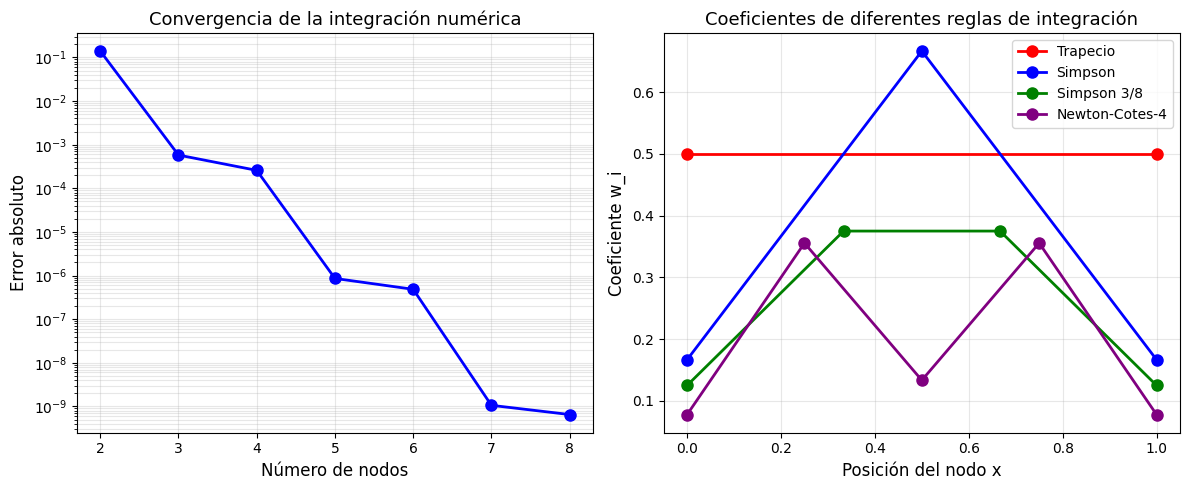


✓ Conclusiones:
  • Los coeficientes satisfacen Σw_i = b-a para todas las reglas
  • Simpson es más preciso que el trapecio para el mismo número de nodos
  • Los coeficientes tienen simetría para nodos equiespaciados
  • El error disminuye al aumentar el número de nodos
  • Los nodos extremos generalmente tienen menor peso que los centrales


In [15]:
print("=" * 70)
print("PRUEBA: Coeficientes de integración numérica")
print("=" * 70)

# CASO 1: Regla del Trapecio (2 nodos)
print("\n📌 Caso 1: Regla del Trapecio")
print("-" * 70)

a, b = 0, 2
soporte = [a, b]
coef = incoef_base(soporte, a, b)

print(f"Intervalo de integración: [{a}, {b}]")
print(f"Soporte (nodos): {soporte}")
print(f"Coeficientes obtenidos: {[round(c, 4) for c in coef]}")

# Coeficientes teóricos: [(b-a)/2, (b-a)/2] = [1, 1]
h = b - a
coef_teorico = [h/2, h/2]
print(f"Coeficientes teóricos: {coef_teorico}")

# Verificar propiedad: suma de coeficientes = longitud del intervalo
suma_coef = sum(coef)
print(f"\n✓ Suma de coeficientes: {suma_coef:.6f}")
print(f"✓ Longitud del intervalo (b-a): {b-a}")
print(f"✓ Propiedad verificada: suma = b-a? {np.isclose(suma_coef, b-a)}")

# Validación: integrar f(x) = x² en [0, 2]
f = lambda x: x**2
integral_exacta = (b**3 - a**3) / 3  # ∫x² dx = x³/3
integral_numerica = sum(coef[i] * f(soporte[i]) for i in range(len(soporte)))
error = abs(integral_numerica - integral_exacta)

print(f"\n✓ Validación con f(x) = x²:")
print(f"  Integral exacta: {integral_exacta:.10f}")
print(f"  Integral numérica: {integral_numerica:.10f}")
print(f"  Error: {error:.6f}")
print(f"  (Error esperado O(h³) para trapecio con f''(x) ≠ 0)")

# CASO 2: Regla de Simpson (3 nodos)
print("\n\n📌 Caso 2: Regla de Simpson")
print("-" * 70)

a, b = 0, 2
h = (b - a) / 2
soporte = [a, a+h, b]
coef = incoef_base(soporte, a, b)

print(f"Intervalo de integración: [{a}, {b}]")
print(f"Soporte (nodos): {soporte}")
print(f"Coeficientes obtenidos: {[round(c, 4) for c in coef]}")

# Coeficientes teóricos: [h/3, 4h/3, h/3] = [1/3, 4/3, 1/3] para h=1
coef_teorico = [h/3, 4*h/3, h/3]
print(f"Coeficientes teóricos: {[round(c, 4) for c in coef_teorico]}")

# Verificar propiedad
suma_coef = sum(coef)
print(f"\n✓ Suma de coeficientes: {suma_coef:.6f}")
print(f"✓ Longitud del intervalo (b-a): {b-a}")
print(f"✓ Propiedad verificada: {np.isclose(suma_coef, b-a)}")

# Validación: integrar f(x) = x³ en [0, 2]
f = lambda x: x**3
integral_exacta = (b**4 - a**4) / 4  # ∫x³ dx = x⁴/4
integral_numerica = sum(coef[i] * f(soporte[i]) for i in range(len(soporte)))
error = abs(integral_numerica - integral_exacta)

print(f"\n✓ Validación con f(x) = x³:")
print(f"  Integral exacta: {integral_exacta:.10f}")
print(f"  Integral numérica: {integral_numerica:.10f}")
print(f"  Error: {error:.2e}")
print(f"  Simpson integra exactamente polinomios de grado ≤ 3!")

# CASO 3: Regla de Simpson 3/8 (4 nodos)
print("\n\n📌 Caso 3: Regla de Simpson 3/8")
print("-" * 70)

a, b = 0, 3
h = (b - a) / 3
soporte = [a, a+h, a+2*h, b]
coef = incoef_base(soporte, a, b)

print(f"Intervalo de integración: [{a}, {b}]")
print(f"Soporte (nodos): {soporte}")
print(f"Coeficientes obtenidos: {[round(c, 4) for c in coef]}")

# Coeficientes teóricos: [3h/8, 9h/8, 9h/8, 3h/8]
coef_teorico = [3*h/8, 9*h/8, 9*h/8, 3*h/8]
print(f"Coeficientes teóricos: {[round(c, 4) for c in coef_teorico]}")

# Verificar propiedad
suma_coef = sum(coef)
print(f"\n✓ Suma de coeficientes: {suma_coef:.6f}")
print(f"✓ Longitud del intervalo (b-a): {b-a}")

# CASO 4: Regla con 5 nodos (Newton-Cotes de orden 4)
print("\n\n📌 Caso 4: Newton-Cotes con 5 nodos")
print("-" * 70)

a, b = 0, 4
h = (b - a) / 4
soporte = [a + i*h for i in range(5)]
coef = incoef_base(soporte, a, b)

print(f"Intervalo de integración: [{a}, {b}]")
print(f"Soporte (nodos): {soporte}")
print(f"Coeficientes obtenidos: {[round(c, 6) for c in coef]}")

# Coeficientes teóricos: [2h/45, 16h/45, 12h/45, 16h/45, 2h/45]
# Para h=1: [2/45, 16/45, 12/45, 16/45, 2/45]
coef_teorico = [2*h/45, 16*h/45, 12*h/45, 16*h/45, 2*h/45]
print(f"Coeficientes teóricos: {[round(c, 6) for c in coef_teorico]}")

# Verificar simetría de los coeficientes
print(f"\n✓ Verificación de simetría:")
print(f"  coef[0] = coef[4]? {np.isclose(coef[0], coef[4])}")
print(f"  coef[1] = coef[3]? {np.isclose(coef[1], coef[3])}")

# Validación con función suave
f = lambda x: np.sin(x)
integral_exacta = -np.cos(b) + np.cos(a)
integral_numerica = sum(coef[i] * f(soporte[i]) for i in range(len(soporte)))
error = abs(integral_numerica - integral_exacta)

print(f"\n✓ Validación con f(x) = sin(x) en [{a}, {b}]:")
print(f"  Integral exacta: {integral_exacta:.10f}")
print(f"  Integral numérica: {integral_numerica:.10f}")
print(f"  Error: {error:.2e}")

# CASO 5: Análisis de convergencia
print("\n\n📌 Caso 5: Análisis de convergencia con diferentes números de nodos")
print("-" * 70)

# Función de prueba: f(x) = exp(x) en [0, 1]
f = lambda x: np.exp(x)
a, b = 0, 1
integral_exacta = np.exp(b) - np.exp(a)

n_nodos = [2, 3, 4, 5, 6, 7, 8]
errores = []

print(f"Función: f(x) = exp(x)")
print(f"Intervalo: [{a}, {b}]")
print(f"Integral exacta: {integral_exacta:.12f}\n")

print(f"{'N nodos':>8s} {'Coeficientes':>50s} {'Integral':>15s} {'Error':>12s}")
print("-" * 90)

for n in n_nodos:
    h = (b - a) / (n - 1)
    soporte = [a + i*h for i in range(n)]
    coef = incoef_base(soporte, a, b)
    
    integral_num = sum(coef[i] * f(soporte[i]) for i in range(n))
    error = abs(integral_num - integral_exacta)
    errores.append(error)
    
    # Formatear coeficientes (mostrar solo 3 primeros si son muchos)
    if n <= 4:
        coef_str = str([round(c, 3) for c in coef])
    else:
        coef_str = f"[{round(coef[0], 3)}, ..., {round(coef[-1], 3)}]"
    
    print(f"{n:8d} {coef_str:>50s} {integral_num:15.10f} {error:12.2e}")

# Visualización
plt.figure(figsize=(12, 5))

# Gráfica 1: Error vs número de nodos
plt.subplot(1, 2, 1)
plt.semilogy(n_nodos, errores, 'o-', linewidth=2, markersize=8, color='blue')
plt.xlabel('Número de nodos', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Convergencia de la integración numérica', fontsize=13)
plt.grid(True, alpha=0.3, which='both')

# Gráfica 2: Coeficientes para diferentes reglas
plt.subplot(1, 2, 2)
reglas = [(2, 'Trapecio'), (3, 'Simpson'), (4, 'Simpson 3/8'), (5, 'Newton-Cotes-4')]
colores = ['red', 'blue', 'green', 'purple']

for (n, nombre), color in zip(reglas, colores):
    h = (b - a) / (n - 1)
    soporte = [a + i*h for i in range(n)]
    coef = incoef_base(soporte, a, b)
    plt.plot(soporte, coef, 'o-', label=nombre, linewidth=2, markersize=8, color=color)

plt.xlabel('Posición del nodo x', fontsize=12)
plt.ylabel('Coeficiente w_i', fontsize=12)
plt.title('Coeficientes de diferentes reglas de integración', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Conclusiones:")
print("  • Los coeficientes satisfacen Σw_i = b-a para todas las reglas")
print("  • Simpson es más preciso que el trapecio para el mismo número de nodos")
print("  • Los coeficientes tienen simetría para nodos equiespaciados")
print("  • El error disminuye al aumentar el número de nodos")
print("  • Los nodos extremos generalmente tienen menor peso que los centrales")


---

## ***Ejercicio 7: Integración; Metodo de Romberg***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Crear una función que calcule los la integral definida de una función utilizando el método de Romberg, hasta alcanzar una tolerancia dada (10-6, por defecto) y sin exceder el nivel máximo de subdivisiones (10 por defecto).

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code> in_romberg(fun,a,b,nivel,tol)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>fun</code>: función dada<br>
<code>nivel</code>: <br>
<code>a</code>: limite del intervalo por la izda<br>
<code>b</code>: limite del intervalo por la derecha<br>
<code>tol</code>: 
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
valor estimado de la integral<code> val</code><br>
<br>
valor estimado del error <code>err</code><br>
<br>
tabla <code>print()--> de algo como una tabla</code>
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Método de Romberg: Extrapolación de Richardson

El **método de Romberg** es una técnica de integración numérica que combina la regla del trapecio con **extrapolación de Richardson** para obtener aproximaciones de alta precisión.

#### Algoritmo Base: Regla del Trapecio Compuesta

Se parte de subdivisiones sucesivas con $2^k$ subintervalos:

$$T(h_k) = \frac{h_k}{2}\left[f(a) + 2\sum_{i=1}^{2^k-1} f(x_i) + f(b)\right]$$

donde $h_k = \frac{b-a}{2^k}$.

#### Tabla de Romberg

Se construye una tabla triangular $R_{k,j}$ mediante extrapolación:

$$R_{k,0} = T(h_k) \quad \text{(valores del trapecio)}$$

$$R_{k,j} = R_{k,j-1} + \frac{R_{k,j-1} - R_{k-1,j-1}}{4^j - 1}$$

#### Estructura de la Tabla

```
R_{0,0}
R_{1,0}  R_{1,1}
R_{2,0}  R_{2,1}  R_{2,2}
R_{3,0}  R_{3,1}  R_{3,2}  R_{3,3}
  ⋮        ⋮        ⋮        ⋮      ⋱
```

Cada columna tiene un orden de precisión mayor:
- Columna 0: Trapecio $\mathcal{O}(h^2)$
- Columna 1: Simpson $\mathcal{O}(h^4)$
- Columna 2: Boole $\mathcal{O}(h^6)$
- Columna $j$: $\mathcal{O}(h^{2j+2})$

#### Criterio de Convergencia

El proceso se detiene cuando:

$$|R_{k,k} - R_{k-1,k-1}| < \text{tol}$$

o se alcanza el nivel máximo de subdivisiones.

#### Ventajas

✅ **Convergencia rápida**: Orden $\mathcal{O}(h^{2m})$ muy alto  
✅ **Adaptativo**: Se detiene automáticamente al alcanzar la tolerancia  
✅ **Eficiente**: Reutiliza evaluaciones previas de la función


### 💻 Implementación
</div>

In [16]:

def in_romberg(fun,a,b,nivel=10,tol=1e-6):
    '''
    Esta función calcula la integral definida de una función utilizando el método
    de Romberg, que combina la regla del trapecio con extrapolación de Richardson
    para obtener alta precisión. El método construye una tabla triangular donde
    cada entrada mejora la aproximación mediante eliminación sucesiva de términos
    de error.
    
    El método itera hasta alcanzar la tolerancia especificada o el nivel máximo.

    PARÁMETROS DE LA FUNCIÓN
    -------------------------
    fun: función a integrar
    a, b: límites de integración [a, b]
    nivel: número máximo de refinamientos (por defecto 10)
    tol: tolerancia para el criterio de parada (por defecto 1e-6)
    
    RETORNO
    -------
    N[n][n]: mejor aproximación de la integral obtenida
    delta: estimación del error en la última iteración
    N: tabla completa de Romberg con todas las aproximaciones
    '''
    # 1. Crear matriz N
    N = np.zeros((nivel, nivel))

    # 2. Inicialización
    h = b - a
    N[0][0] = (fun(a) + fun(b)) * (h / 2)
    p = 1  # Puntos a añadir

    # Variable para almacenar el error de la diagonal
    last_delta = 0.0

    # 3. Iteración principal
    for n in range(1, nivel):
        # a) Modificar h
        h = h / 2

        # b) Calcular p puntos equiespaciados (los nuevos impares)
        puntos = [a + (2 * i - 1) * h for i in range(1, p + 1)]

        # c) Trapecio compuesto (fórmula recursiva)
        # Nota: Usamos sum() generador para eficiencia
        N[n][0] = 0.5 * N[n-1][0] + h * sum(fun(x) for x in puntos)
        
        # d) Extrapolación de Richardson
        q = 1
        for j in range(1, n + 1):
            # 1) Modificar q (4^j)
            q = q * 4
            
            # 2) Calcular corrección delta
            delta = (1 / (q - 1)) * (N[n][j-1] - N[n-1][j-1])
            
            # 3) Obtener nuevo valor de la columna
            N[n][j] = N[n][j-1] + delta
            
            # Si estamos en la diagonal, guardamos este delta para comparar
            if j == n:
                last_delta = delta

        # e) Criterio de parada
        # Se verifica solo si la corrección de la diagonal cumple la tolerancia
        if abs(last_delta) < tol:
            return N[n][n], last_delta, N
        else:
            # Si no converge, simplemente duplicamos p y DEJAMOS que el bucle siga
            p = 2 * p

    # Si terminamos todos los niveles sin llegar a la tolerancia:
    return N[nivel-1][nivel-1], last_delta, N


### 🧪 Prueba y Validación

PRUEBA: Método de Romberg

📌 Caso 1: Integración de f(x) = x² en [0, 1]
----------------------------------------------------------------------
Función: f(x) = x²
Intervalo: [0, 1]
Integral exacta: 0.333333333333333
Aproximación Romberg: 0.333333333333333
Error estimado: 0.00e+00
Error real: 0.00e+00

✓ Tabla de Romberg (primeras filas):
          Columna 0       Columna 1       Columna 2       Columna 3
      0.5000000000 
      0.3750000000    0.3333333333 
      0.3437500000    0.3333333333    0.3333333333 
   
   


📌 Caso 2: Integración de f(x) = sin(x) en [0, π]
----------------------------------------------------------------------
Función: f(x) = sin(x)
Intervalo: [0, π]
Integral exacta: 2.000000000000000
Aproximación Romberg: 2.000000000001321
Error estimado: 5.29e-12
Error real: 1.32e-12

✓ Convergencia en la diagonal (mejores estimaciones):
    Nivel              Valor Error vs exacta
   ----------------------------------------
        0     0.000000000000        2.00e+00
    

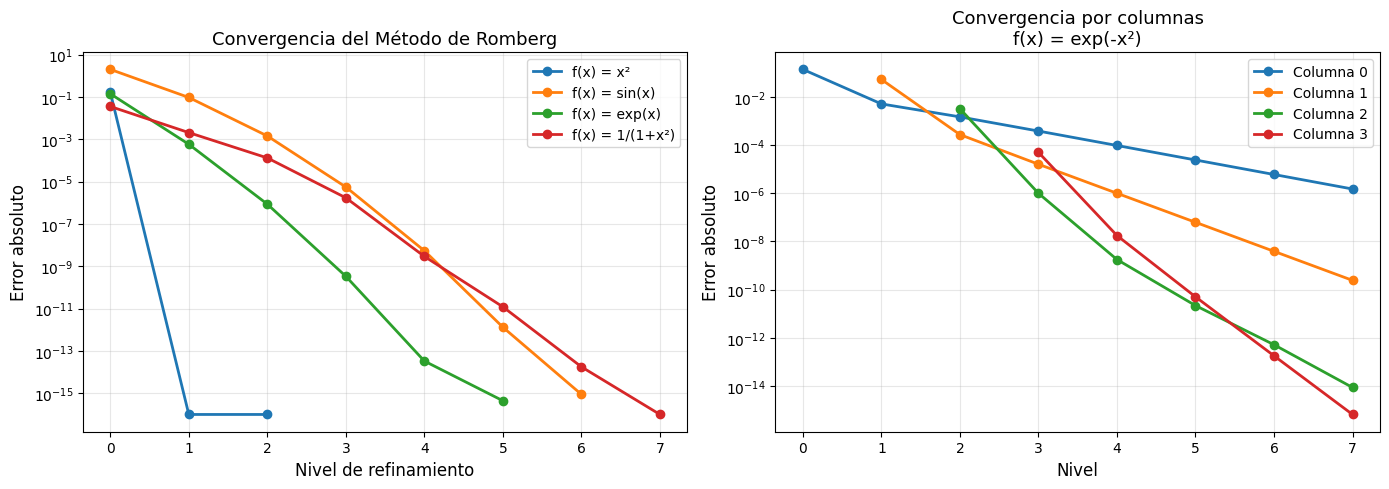


✓ Conclusiones:
  • Romberg converge exponencialmente rápido para funciones suaves
  • Cada columna tiene mayor orden de precisión (2, 4, 6, 8, ...)
  • La diagonal contiene las mejores aproximaciones de cada nivel
  • El método reutiliza evaluaciones previas (muy eficiente)
  • Para funciones analíticas, la precisión de máquina se alcanza rápidamente


In [17]:
print("=" * 70)
print("PRUEBA: Método de Romberg")
print("=" * 70)

# CASO 1: Función polinomial simple
print("\n📌 Caso 1: Integración de f(x) = x² en [0, 1]")
print("-" * 70)

f = lambda x: x**2
a, b = 0, 1
integral_exacta = (b**3 - a**3) / 3  # ∫x² dx = x³/3

# Aplicar Romberg con tolerancia estricta
resultado, error, tabla = in_romberg(f, a, b, nivel=6, tol=1e-10)

print(f"Función: f(x) = x²")
print(f"Intervalo: [{a}, {b}]")
print(f"Integral exacta: {integral_exacta:.15f}")
print(f"Aproximación Romberg: {resultado:.15f}")
print(f"Error estimado: {error:.2e}")
print(f"Error real: {abs(resultado - integral_exacta):.2e}")

# Mostrar tabla de Romberg
print("\n✓ Tabla de Romberg (primeras filas):")
print("   ", "Columna 0".rjust(15), "Columna 1".rjust(15), "Columna 2".rjust(15), "Columna 3".rjust(15))
for i in range(min(5, len(tabla))):
    fila = "   "
    for j in range(i+1):
        if tabla[i][j] != 0:
            fila += f"{tabla[i][j]:15.10f} "
    print(fila)

# CASO 2: Función trigonométrica
print("\n\n📌 Caso 2: Integración de f(x) = sin(x) en [0, π]")
print("-" * 70)

f = lambda x: np.sin(x)
a, b = 0, np.pi
integral_exacta = -np.cos(b) + np.cos(a)  # ∫sin(x) dx = -cos(x)

resultado, error, tabla = in_romberg(f, a, b, nivel=8, tol=1e-8)

print(f"Función: f(x) = sin(x)")
print(f"Intervalo: [0, π]")
print(f"Integral exacta: {integral_exacta:.15f}")
print(f"Aproximación Romberg: {resultado:.15f}")
print(f"Error estimado: {error:.2e}")
print(f"Error real: {abs(resultado - integral_exacta):.2e}")

# Mostrar convergencia diagonal
print("\n✓ Convergencia en la diagonal (mejores estimaciones):")
print(f"   {'Nivel':>6s} {'Valor':>18s} {'Error vs exacta':>15s}")
print("   " + "-" * 40)
for i in range(min(6, len(tabla))):
    if tabla[i][i] != 0:
        error_real = abs(tabla[i][i] - integral_exacta)
        print(f"   {i:6d} {tabla[i][i]:18.12f} {error_real:15.2e}")

# CASO 3: Función exponencial
print("\n\n📌 Caso 3: Integración de f(x) = exp(x) en [0, 2]")
print("-" * 70)

f = lambda x: np.exp(x)
a, b = 0, 2
integral_exacta = np.exp(b) - np.exp(a)  # ∫exp(x) dx = exp(x)

resultado, error, tabla = in_romberg(f, a, b, nivel=7, tol=1e-9)

print(f"Función: f(x) = exp(x)")
print(f"Intervalo: [{a}, {b}]")
print(f"Integral exacta: {integral_exacta:.15f}")
print(f"Aproximación Romberg: {resultado:.15f}")
print(f"Error estimado: {error:.2e}")
print(f"Error real: {abs(resultado - integral_exacta):.2e}")

# CASO 4: Comparación con diferentes tolerancias
print("\n\n📌 Caso 4: Análisis de convergencia con diferentes tolerancias")
print("-" * 70)

f = lambda x: np.sin(x) * np.exp(-x)
a, b = 0, 2*np.pi
# Integral exacta: ∫sin(x)exp(-x)dx = -exp(-x)(sin(x) + cos(x))/2
integral_exacta = (-(np.exp(-b)*(np.sin(b) + np.cos(b)) - np.exp(-a)*(np.sin(a) + np.cos(a)))/2)

tolerancias = [1e-3, 1e-6, 1e-9, 1e-12]
resultados_tol = []

print(f"Función: f(x) = sin(x)·exp(-x)")
print(f"Intervalo: [0, 2π]")
print(f"Integral exacta: {integral_exacta:.15f}\n")

print(f"{'Tolerancia':>12s} {'Resultado':>18s} {'Error real':>15s} {'Niveles':>8s}")
print("-" * 60)

for tol in tolerancias:
    resultado, err_est, tabla = in_romberg(f, a, b, nivel=15, tol=tol)
    error_real = abs(resultado - integral_exacta)
    
    # Contar cuántas filas se usaron (niveles)
    niveles_usados = 0
    for i in range(len(tabla)):
        if tabla[i][i] != 0:
            niveles_usados = i + 1
    
    resultados_tol.append((tol, resultado, error_real, niveles_usados))
    print(f"{tol:12.0e} {resultado:18.12f} {error_real:15.2e} {niveles_usados:8d}")

# CASO 5: Visualización de la tabla completa
print("\n\n📌 Caso 5: Visualización completa de la tabla de Romberg")
print("-" * 70)

f = lambda x: 1 / (1 + x**2)
a, b = 0, 1
integral_exacta = np.arctan(b) - np.arctan(a)  # ∫1/(1+x²)dx = arctan(x)

resultado, error, tabla = in_romberg(f, a, b, nivel=6, tol=1e-10)

print(f"Función: f(x) = 1/(1+x²)")
print(f"Intervalo: [{a}, {b}]")
print(f"Integral exacta (π/4): {integral_exacta:.15f}")
print(f"Aproximación Romberg: {resultado:.15f}\n")

print("✓ Tabla completa de Romberg:")
print("   (cada fila representa un refinamiento, cada columna un orden de extrapolación)")
print()

# Encabezado
header = "   Nivel |"
for j in range(6):
    header += f" Columna {j} |".rjust(18)
print(header)
print("   " + "-" * 110)

# Mostrar la tabla
for i in range(min(6, len(tabla))):
    fila = f"   {i:5d} |"
    for j in range(i+1):
        if tabla[i][j] != 0:
            fila += f"{tabla[i][j]:16.12f} |"
        else:
            fila += "                 |"
    print(fila)

print(f"\n✓ La mejor aproximación está en la esquina inferior derecha: {resultado:.15f}")
print(f"✓ Error estimado: {error:.2e}")

# Visualización gráfica
print("\n\n📊 Visualización de la convergencia")
print("-" * 70)

# Probar varias funciones y comparar convergencia
funciones = [
    (lambda x: x**2, 0, 1, "x²", lambda x: x**3/3),
    (lambda x: np.sin(x), 0, np.pi, "sin(x)", lambda x: -np.cos(x)),
    (lambda x: np.exp(x), 0, 1, "exp(x)", lambda x: np.exp(x)),
    (lambda x: 1/(1+x**2), 0, 1, "1/(1+x²)", lambda x: np.arctan(x))
]

plt.figure(figsize=(14, 5))

# Gráfica 1: Convergencia diagonal
plt.subplot(1, 2, 1)
for func, a, b, nombre, primitiva in funciones:
    exacta = primitiva(b) - primitiva(a)
    resultado, error, tabla = in_romberg(func, a, b, nivel=10, tol=1e-15)
    
    errores_diag = []
    for i in range(len(tabla)):
        if tabla[i][i] != 0:
            error_i = abs(tabla[i][i] - exacta)
            if error_i > 0:  # Evitar log(0)
                errores_diag.append(error_i)
            else:
                errores_diag.append(1e-16)
    
    plt.semilogy(range(len(errores_diag)), errores_diag, 'o-', label=f'f(x) = {nombre}', linewidth=2, markersize=6)

plt.xlabel('Nivel de refinamiento', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Convergencia del Método de Romberg', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both')

# Gráfica 2: Comparación de columnas (para una función)
plt.subplot(1, 2, 2)
f = lambda x: np.exp(-x**2)
a, b = 0, 2
from scipy.special import erf
integral_exacta = np.sqrt(np.pi)/2 * erf(b)

resultado, error, tabla = in_romberg(f, a, b, nivel=8, tol=1e-15)

# Mostrar convergencia por columnas
for j in range(min(4, len(tabla[0]))):
    errores_col = []
    niveles_col = []
    for i in range(j, len(tabla)):
        if tabla[i][j] != 0:
            error_ij = abs(tabla[i][j] - integral_exacta)
            if error_ij > 0:
                errores_col.append(error_ij)
                niveles_col.append(i)
    
    if len(errores_col) > 0:
        plt.semilogy(niveles_col, errores_col, 'o-', label=f'Columna {j}', linewidth=2, markersize=6)

plt.xlabel('Nivel', fontsize=12)
plt.ylabel('Error absoluto', fontsize=12)
plt.title('Convergencia por columnas\nf(x) = exp(-x²)', fontsize=13)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

print("\n✓ Conclusiones:")
print("  • Romberg converge exponencialmente rápido para funciones suaves")
print("  • Cada columna tiene mayor orden de precisión (2, 4, 6, 8, ...)")
print("  • La diagonal contiene las mejores aproximaciones de cada nivel")
print("  • El método reutiliza evaluaciones previas (muy eficiente)")
print("  • Para funciones analíticas, la precisión de máquina se alcanza rápidamente")

---

## ***Ejercicio 8: Problema del Paracaidista - Ecuaciones Diferenciales con Eventos***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Simular la caída de un paracaidista considerando dos fases: caída libre y descenso con paracaídas abierto, utilizando ecuaciones diferenciales ordinarias (EDOs) con eventos.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>paracaidista(y0, v0, m, cx, At, apertura=1500, rovar=False)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>y0</code>: altura inicial (m)<br>
<code>v0</code>: velocidad inicial (m/s)<br>
<code>m</code>: masa del paracaidista (kg)<br>
<code>cx</code>: lista con coeficientes de arrastre [antes, después]<br>
<code>At</code>: lista con áreas transversales [antes, después] (m²)<br>
<code>apertura</code>: altura de apertura del paracaídas (m, default=1500)<br>
<code>rovar</code>: densidad variable con altura (bool, default=False)
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
Lista [v_max, v_impacto, t_apertura, t_total]
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Modelo Físico de la Caída

El movimiento del paracaidista está gobernado por dos fuerzas principales:

1. **Fuerza gravitatoria**: $F_g = mg$ (hacia abajo)
2. **Fuerza de arrastre**: $F_d = \frac{1}{2}\rho c_x A_t v^2$ (opuesta al movimiento)

#### Sistema de Ecuaciones Diferenciales

El sistema de EDOs que describe el movimiento es:

$$\begin{cases}
\frac{dy}{dt} = v \\
\frac{dv}{dt} = -g - \frac{1}{2m}\rho c_x A_t v|v|
\end{cases}$$

donde:
- $y(t)$: altura sobre el suelo
- $v(t)$: velocidad (positiva hacia arriba)
- $g = 9.81$ m/s²: aceleración gravitatoria
- $\rho$: densidad del aire (kg/m³)
- $c_x$: coeficiente de arrastre (adimensional)
- $A_t$: área transversal (m²)

#### Densidad del Aire

- **Constante**: $\rho_0 = 1.225$ kg/m³ (nivel del mar)
- **Variable**: $\rho(h) = \rho_0 e^{-h/8243}$ (modelo exponencial)

#### Dos Fases del Movimiento

<div style="background-color: #fff3e0; padding: 15px; border-left: 4px solid #ff9800; margin: 10px 0;">

**Fase 1: Caída Libre** (desde $y_0$ hasta altura de apertura)
- Configuración de cuerpo en caída libre
- $c_x \approx 0.5-1.0$, $A_t \approx 0.5$ m² (posición horizontal)

**Fase 2: Con Paracaídas** (desde apertura hasta el suelo)
- Configuración con paracaídas abierto
- $c_x \approx 1.5$, $A_t \approx 20-30$ m² (paracaídas circular)

</div>

#### Eventos en la Simulación

1. **Evento de apertura**: $y(t) = h_{apertura}$ (dirección decreciente)
2. **Evento de impacto**: $y(t) = 0$ (dirección decreciente)

Ambos eventos son **terminales**, es decir, detienen la integración.

### 💻 Implementación

In [18]:
def paracaidista(y0, v0, m, cx, At, apertura=1500, rovar=False):
    '''
    Determina el tiempo y la velocidad a la que toma tierra un paracaidista.
    
    PARÁMETROS DE LA FUNCIÓN
    -------------------------
    y0 : posición inicial del salto (m)
    v0 : velocidad inicial del salto (m/s)
    m : masa del paracaidista equipado (kg)
    cx : iterable con coeficientes de arrastre [antes_apertura, después_apertura]
    At : área transversal (m²)
    apertura : altura a la que se abre el paracaídas (m), por defecto 1500
    rovar : valor lógico que indica si la densidad es variable o no, por defecto False
    
    RESULTADO
    ---------
    Lista con cuatro valores: [v_max, v_impacto, t_apertura, t_total]
        - v_max: velocidad máxima alcanzada (m/s)
        - v_impacto: velocidad de impacto en el suelo (m/s)
        - t_apertura: tiempo hasta que abre el paracaídas (s)
        - t_total: tiempo total de vuelo (s)
    '''
    
    # Constantes físicas
    g = 9.81  # Aceleración de la gravedad (m/s²)
    rho_0 = 1.225  # Densidad del aire a nivel del mar (kg/m³)
    
    # Tiempos máximos estimados para cada fase
    t_fin1 = 100  # Tiempo máximo fase 1 (caída libre)
    t_fin2 = 500  # Tiempo máximo fase 2 (con paracaídas)
    
    # Condiciones iniciales
    ci = [y0, v0]
    
    # * Sistema de ecuaciones diferenciales
    def sedo(t, Y, m, cx_val, At, rovar):
        '''
        Sistema de EDOs para el movimiento del paracaidista
        Y[0] = y(t): altura
        Y[1] = v(t): velocidad
        '''
        # Densidad del aire (constante o variable)
        rho = rho_0
        if rovar:
            rho = rho_0 * np.exp(-Y[0]/8243)
        
        # Coeficiente de arrastre
        kw = cx_val * rho * At / 2
        
        # Sistema de ecuaciones: [dy/dt, dv/dt]
        dY = np.array([
            Y[1],  # dy/dt = v
            -g - (kw * Y[1] * abs(Y[1])) / m  # dv/dt = -g - (arrastre)/m
        ])
        return dY
    
    # * FASE 1: Caída libre hasta la apertura del paracaídas
    
    # Evento: apertura del paracaídas en la altura especificada
    def abreParaca(t, Y, m, cx_val, At, rovar):
        return Y[0] - apertura
    abreParaca.terminal = True  # Detiene la integración
    abreParaca.direction = -1   # Solo cuando Y[0] decrece
    
    # Resolver fase 1 con cx[0] (antes de la apertura)
    sol1 = sp.integrate.solve_ivp(
        sedo, 
        [0, t_fin1], 
        ci, 
        args=[m, cx[0], At, rovar], 
        events=abreParaca,
        dense_output=True
    )
    
    # * FASE 2: Descenso con paracaídas hasta el suelo
    
    # Evento: impacto con el suelo
    def impactoSuelo(t, Y, m, cx_val, At, rovar):
        return Y[0]
    impactoSuelo.terminal = True  # Detiene la integración
    impactoSuelo.direction = -1   # Solo cuando Y[0] decrece
    
    # Condiciones iniciales de la fase 2: estado final de la fase 1
    ci2 = [sol1.y[0, -1], sol1.y[1, -1]]
    t_inicio2 = sol1.t[-1]
    
    # Resolver fase 2 con cx[1] (después de la apertura)
    sol2 = sp.integrate.solve_ivp(
        sedo,
        [t_inicio2, t_fin2],
        ci2,
        args=[m, cx[1], At, rovar],
        events=impactoSuelo,
        dense_output=True
    )
    
    # * Cálculo de resultados
    
    # Velocidad máxima (en valor absoluto) en toda la trayectoria
    v_max = max(np.max(np.abs(sol1.y[1])), np.max(np.abs(sol2.y[1])))
    
    # Velocidad de impacto (en el último punto de sol2)
    v_impacto = abs(sol2.y[1, -1])
    
    # Tiempo de apertura del paracaídas
    t_apertura = sol1.t[-1]
    
    # Tiempo total de vuelo
    t_total = sol2.t[-1]
    
    return [v_max, v_impacto, t_apertura, t_total]

### 🧪 Prueba y Validación

PRUEBA: Simulación del Paracaidista

📌 Caso 1: Salto estándar desde 3000 m
----------------------------------------------------------------------
Altura inicial: 3000 m
Masa del paracaidista: 80 kg
Altura de apertura: 1500 m
Coeficientes de arrastre: [0.7, 1.5]
Área transversal: 0.5 m²

✓ Resultados:
  • Velocidad máxima: 60.50 m/s (217.80 km/h)
  • Velocidad de impacto: 41.35 m/s (148.87 km/h)
  • Tiempo hasta apertura: 29.07 s
  • Tiempo total de vuelo: 64.48 s (1.07 min)


📌 Caso 2: Comparación densidad constante vs variable
----------------------------------------------------------------------
Parámetro                       Constante        Variable      Diferencia
----------------------------------------------------------------------
Velocidad máxima (m/s)              60.50           68.54            8.04
Velocidad impacto (m/s)             41.35           41.57            0.22
Tiempo apertura (s)                 29.07           26.47            2.60
Tiempo total (s)            

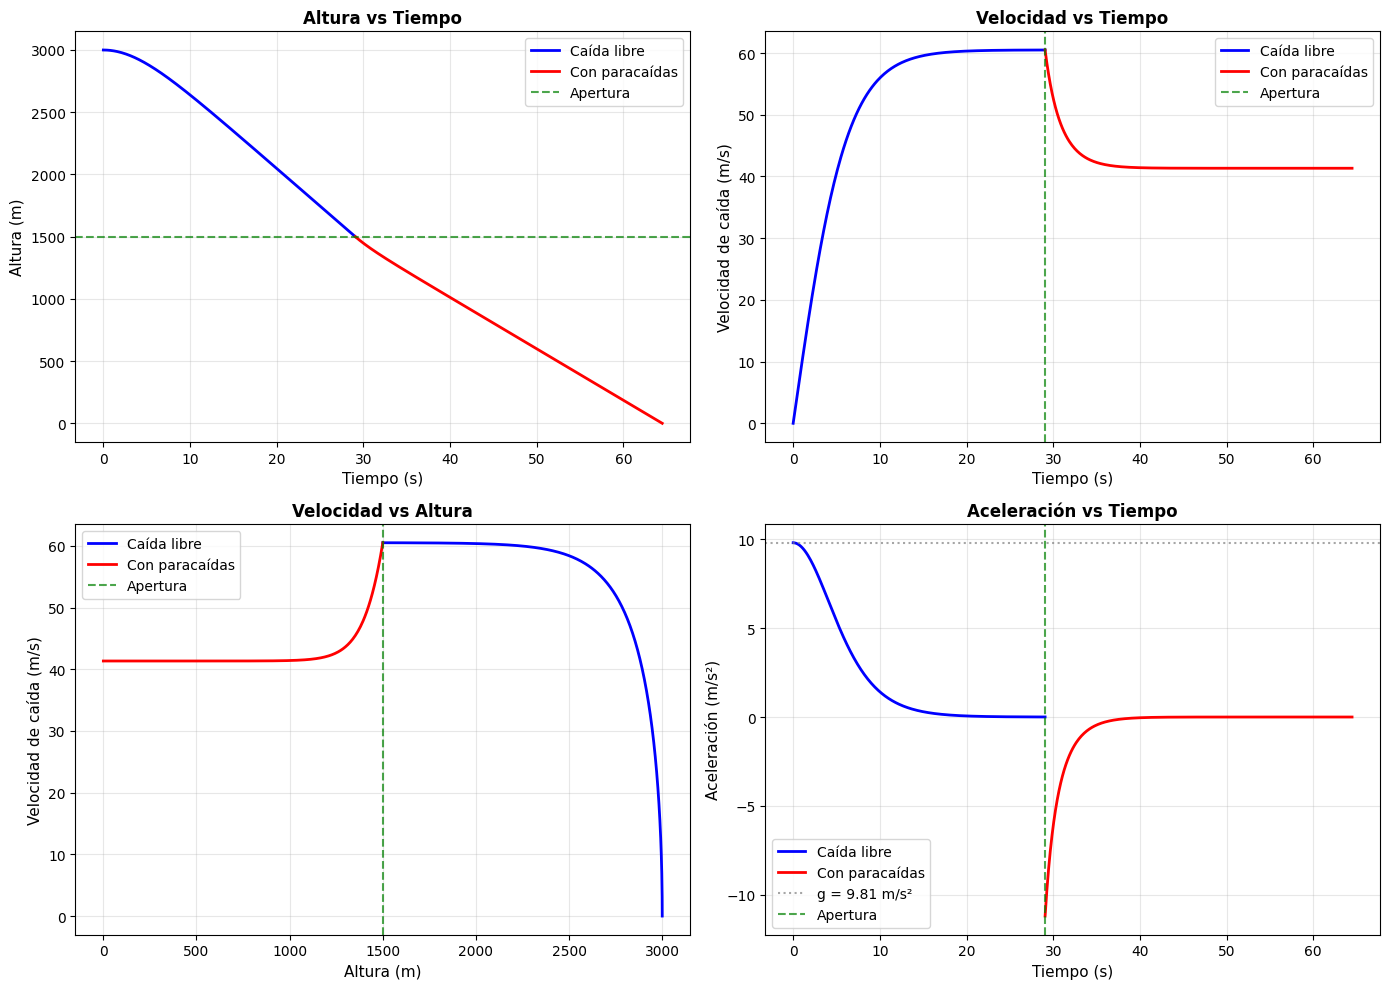


✓ Observaciones:
  • La velocidad aumenta durante la caída libre hasta alcanzar un máximo
  • Al abrir el paracaídas, hay una desaceleración brusca
  • La velocidad se estabiliza a un valor terminal menor
  • La aceleración es mayor que g inicialmente, luego se reduce por el arrastre


In [19]:
print("=" * 70)
print("PRUEBA: Simulación del Paracaidista")
print("=" * 70)

# CASO 1: Paracaidista estándar con densidad constante
print("\n📌 Caso 1: Salto estándar desde 3000 m")
print("-" * 70)

# Parámetros físicos
y0 = 3000  # Altura inicial: 3000 m
v0 = 0     # Velocidad inicial: 0 m/s (desde reposo)
m = 80     # Masa: 80 kg
cx = [0.7, 1.5]  # Coeficientes de arrastre: [caída libre, con paracaídas]
At = 0.5   # Área transversal en m²
apertura = 1500  # Altura de apertura: 1500 m

# Simular
resultado = paracaidista(y0, v0, m, cx, At, apertura, rovar=False)
v_max, v_impacto, t_apertura, t_total = resultado

print(f"Altura inicial: {y0} m")
print(f"Masa del paracaidista: {m} kg")
print(f"Altura de apertura: {apertura} m")
print(f"Coeficientes de arrastre: {cx}")
print(f"Área transversal: {At} m²")
print(f"\n✓ Resultados:")
print(f"  • Velocidad máxima: {v_max:.2f} m/s ({v_max*3.6:.2f} km/h)")
print(f"  • Velocidad de impacto: {v_impacto:.2f} m/s ({v_impacto*3.6:.2f} km/h)")
print(f"  • Tiempo hasta apertura: {t_apertura:.2f} s")
print(f"  • Tiempo total de vuelo: {t_total:.2f} s ({t_total/60:.2f} min)")

# CASO 2: Comparación con densidad variable
print("\n\n📌 Caso 2: Comparación densidad constante vs variable")
print("-" * 70)

# Con densidad constante
resultado_const = paracaidista(y0, v0, m, cx, At, apertura, rovar=False)

# Con densidad variable
resultado_var = paracaidista(y0, v0, m, cx, At, apertura, rovar=True)

print(f"{'Parámetro':<25s} {'Constante':>15s} {'Variable':>15s} {'Diferencia':>15s}")
print("-" * 70)
print(f"{'Velocidad máxima (m/s)':<25s} {resultado_const[0]:>15.2f} {resultado_var[0]:>15.2f} {abs(resultado_const[0]-resultado_var[0]):>15.2f}")
print(f"{'Velocidad impacto (m/s)':<25s} {resultado_const[1]:>15.2f} {resultado_var[1]:>15.2f} {abs(resultado_const[1]-resultado_var[1]):>15.2f}")
print(f"{'Tiempo apertura (s)':<25s} {resultado_const[2]:>15.2f} {resultado_var[2]:>15.2f} {abs(resultado_const[2]-resultado_var[2]):>15.2f}")
print(f"{'Tiempo total (s)':<25s} {resultado_const[3]:>15.2f} {resultado_var[3]:>15.2f} {abs(resultado_const[3]-resultado_var[3]):>15.2f}")

# CASO 3: Análisis de sensibilidad - diferentes alturas de apertura
print("\n\n📌 Caso 3: Sensibilidad a la altura de apertura")
print("-" * 70)

alturas_apertura = [500, 1000, 1500, 2000, 2500]
resultados_alt = []

print(f"{'Altura apertura (m)':>20s} {'V_max (m/s)':>15s} {'V_impacto (m/s)':>18s} {'Tiempo total (s)':>18s}")
print("-" * 70)

for alt in alturas_apertura:
    res = paracaidista(y0, v0, m, cx, At, apertura=alt, rovar=False)
    resultados_alt.append(res)
    print(f"{alt:>20d} {res[0]:>15.2f} {res[1]:>18.2f} {res[3]:>18.2f}")

print("\n✓ Observación: A mayor altura de apertura, menor velocidad máxima alcanzada")

# CASO 4: Visualización completa de una trayectoria
print("\n\n📌 Caso 4: Visualización de la trayectoria")
print("-" * 70)

# Recalcular con dense_output para poder graficar
import scipy.integrate as integrate

# Condiciones
y0, v0, m = 3000, 0, 80
cx = [0.7, 1.5]
At = 0.5
apertura = 1500
g = 9.81
rho_0 = 1.225

# Sistema EDO
def sedo(t, Y, m, cx_val, At, rovar):
    rho = rho_0
    if rovar:
        rho = rho_0 * np.exp(-Y[0]/8243)
    kw = cx_val * rho * At / 2
    dY = np.array([Y[1], -g - (kw * Y[1] * abs(Y[1])) / m])
    return dY

# Eventos
def abreParaca(t, Y, m, cx_val, At, rovar):
    return Y[0] - apertura
abreParaca.terminal = True
abreParaca.direction = -1

def impactoSuelo(t, Y, m, cx_val, At, rovar):
    return Y[0]
impactoSuelo.terminal = True
impactoSuelo.direction = -1

# Fase 1
sol1 = integrate.solve_ivp(sedo, [0, 100], [y0, v0], 
                            args=[m, cx[0], At, False],
                            events=abreParaca, dense_output=True, max_step=0.1)

# Fase 2
sol2 = integrate.solve_ivp(sedo, [sol1.t[-1], 500], [sol1.y[0, -1], sol1.y[1, -1]],
                            args=[m, cx[1], At, False],
                            events=impactoSuelo, dense_output=True, max_step=0.1)

# Graficar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Altura vs tiempo
axes[0, 0].plot(sol1.t, sol1.y[0], 'b-', linewidth=2, label='Caída libre')
axes[0, 0].plot(sol2.t, sol2.y[0], 'r-', linewidth=2, label='Con paracaídas')
axes[0, 0].axhline(y=apertura, color='g', linestyle='--', alpha=0.7, label='Apertura')
axes[0, 0].set_xlabel('Tiempo (s)', fontsize=11)
axes[0, 0].set_ylabel('Altura (m)', fontsize=11)
axes[0, 0].set_title('Altura vs Tiempo', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Velocidad vs tiempo
axes[0, 1].plot(sol1.t, -sol1.y[1], 'b-', linewidth=2, label='Caída libre')
axes[0, 1].plot(sol2.t, -sol2.y[1], 'r-', linewidth=2, label='Con paracaídas')
axes[0, 1].axvline(x=sol1.t[-1], color='g', linestyle='--', alpha=0.7, label='Apertura')
axes[0, 1].set_xlabel('Tiempo (s)', fontsize=11)
axes[0, 1].set_ylabel('Velocidad de caída (m/s)', fontsize=11)
axes[0, 1].set_title('Velocidad vs Tiempo', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Velocidad vs altura
axes[1, 0].plot(sol1.y[0], -sol1.y[1], 'b-', linewidth=2, label='Caída libre')
axes[1, 0].plot(sol2.y[0], -sol2.y[1], 'r-', linewidth=2, label='Con paracaídas')
axes[1, 0].axvline(x=apertura, color='g', linestyle='--', alpha=0.7, label='Apertura')
axes[1, 0].set_xlabel('Altura (m)', fontsize=11)
axes[1, 0].set_ylabel('Velocidad de caída (m/s)', fontsize=11)
axes[1, 0].set_title('Velocidad vs Altura', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Aceleración vs tiempo
acel1 = np.array([sedo(t, sol1.sol(t), m, cx[0], At, False)[1] for t in sol1.t])
acel2 = np.array([sedo(t, sol2.sol(t), m, cx[1], At, False)[1] for t in sol2.t])
axes[1, 1].plot(sol1.t, -acel1, 'b-', linewidth=2, label='Caída libre')
axes[1, 1].plot(sol2.t, -acel2, 'r-', linewidth=2, label='Con paracaídas')
axes[1, 1].axhline(y=g, color='gray', linestyle=':', alpha=0.7, label='g = 9.81 m/s²')
axes[1, 1].axvline(x=sol1.t[-1], color='g', linestyle='--', alpha=0.7, label='Apertura')
axes[1, 1].set_xlabel('Tiempo (s)', fontsize=11)
axes[1, 1].set_ylabel('Aceleración (m/s²)', fontsize=11)
axes[1, 1].set_title('Aceleración vs Tiempo', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Observaciones:")
print("  • La velocidad aumenta durante la caída libre hasta alcanzar un máximo")
print("  • Al abrir el paracaídas, hay una desaceleración brusca")
print("  • La velocidad se estabiliza a un valor terminal menor")
print("  • La aceleración es mayor que g inicialmente, luego se reduce por el arrastre")

---

## ***Ejercicio 9: Método de Disparo - Problemas de Contorno***

<div style="background-color: #f3e5f5; padding: 20px; border-left: 5px solid #9C27B0; border-radius: 5px; margin: 15px 0;">

### 🎯 Objetivo del Ejercicio

Resolver problemas de valores en la frontera (BVP) transformándolos en problemas de valor inicial (IVP) mediante el método de disparo, utilizando el método de la secante para ajustar las condiciones iniciales.

</div>

### 📋 Especificaciones Técnicas

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #f5f5f5;">
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Componente</th>
<th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Función</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;"><code>disparo(F, ab, cc, mi=[0,1], niter=100, xtol=1e-6, ftol=1e-9, **opt)</code></td>
</tr>
<tr style="background-color: #fafafa;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Parámetros</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
<code>F</code>: función que define el sistema de EDOs<br>
<code>ab</code>: intervalo [a, b]<br>
<code>cc</code>: condiciones de contorno [y(a), y(b)]<br>
<code>mi</code>: pendientes iniciales para iteración [m0, m1]<br>
<code>niter</code>: número máximo de iteraciones<br>
<code>xtol</code>: tolerancia en la pendiente<br>
<code>ftol</code>: tolerancia en la solución<br>
<code>**opt</code>: opciones para solve_ivp
</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Salida</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">
Objeto con la solución del BVP (estructura de solve_ivp)
</td>
</tr>
</table>

### 📖 Fundamento Teórico

#### Problema de Valores en la Frontera (BVP)

Un BVP de segundo orden tiene la forma:

$$y'' = f(x, y, y'), \quad y(a) = y_a, \quad y(b) = y_b$$

A diferencia de los problemas de valor inicial, aquí se conocen valores en **dos puntos diferentes** del dominio.

#### Transformación a Sistema de Primer Orden

Definiendo $z = y'$, el problema se convierte en:

$$\begin{cases}
y' = z \\
z' = f(x, y, z)
\end{cases}$$

con $y(a) = y_a$ y $y(b) = y_b$.

#### Método de Disparo

La idea es transformar el BVP en una sucesión de IVPs:

1. **Suposición inicial**: Proponemos $y'(a) = m_0$ (pendiente inicial desconocida)
2. **Resolución del IVP**: Resolvemos el sistema con $y(a) = y_a$ y $y'(a) = m_0$
3. **Verificación**: Comprobamos si $y(b) = y_b$
4. **Ajuste iterativo**: Si no se cumple, ajustamos $m$ usando el método de la secante

#### Método de la Secante para Ajustar la Pendiente

Dado que queremos $y(b; m) = y_b$, definimos:

$$w(m) = y(b; m) - y_b$$

Buscamos $m^*$ tal que $w(m^*) = 0$ usando la secante:

$$m_{k+1} = m_k - w(m_k) \frac{m_k - m_{k-1}}{w(m_k) - w(m_{k-1})}$$

<div style="background-color: #e3f2fd; padding: 15px; border-left: 4px solid #2196f3; margin: 10px 0;">

**Algoritmo del Método de Disparo:**

1. Inicializar con dos valores $m_0$ y $m_1$
2. Resolver IVP con $y(a) = y_a$, $y'(a) = m_0$ → obtener $w_0 = y(b) - y_b$
3. Resolver IVP con $y(a) = y_a$, $y'(a) = m_1$ → obtener $w_1 = y(b) - y_b$
4. Iterar:
   - Calcular nueva pendiente: $m_{k+1} = m_k + (y_b - w_k)\frac{m_k - m_{k-1}}{w_k - w_{k-1}}$
   - Resolver IVP con $m_{k+1}$
   - Verificar convergencia: $|m_{k+1} - m_k| < xtol$ o $|w_{k+1}| < ftol$
5. Retornar la solución convergida

</div>

#### Criterios de Parada

- **Convergencia en pendiente**: $|m_{k+1} - m_k| < xtol$
- **Convergencia en solución**: $|y(b) - y_b| < ftol$
- **Máximo de iteraciones**: $k > niter$

### 💻 Implementación

In [ ]:

def disparo(F, ab, cc, mi=[0, 1], niter=100, xtol=1e-6, ftol=1e-9, **opt):
    '''
    Resuelve un problema de valores en la frontera (P.V.F.) transformándolo en
    un problema de valores iniciales (P.V.I.) mediante el método de disparo.
    
    PARÁMETROS:
    -----------
    F : función (vectorial) que define el SEDO
    ab : intervalo de resolución [a, b]
    cc : condiciones de contorno (Dirichlet) en los extremos [y(a), y(b)]
    mi : valores de la pendiente en las dos primeras iteraciones (default: [0, 1])
    niter : número máximo de iteraciones (default: 100)
    xtol : error admisible en la pendiente (default: 1e-6)
    ftol : error admisible en la solución (default: 1e-9)
    **opt : opciones para solve_ivp (method, dense_output, events)
            Por defecto: method='RK45', dense_output=False, events=None
    
    RESULTADOS:
    -----------
    Estructura de tipo solve_ivp con la solución del problema
    '''
    
    # Configuración de opciones por defecto
    opc = {"method": "RK45", "dense_output": False, "events": None}
    
    # Actualizar opciones con las proporcionadas
    for clave, valor in opt.items():
        clave_lower = clave.lower()
        if clave_lower in ["method", "dense_output", "events"]:
            opc[clave_lower] = valor
        else:
            print(f"Opción '{clave}' inválida")
    
    # 1. Resolución con m1 y obtención de w_n(m1)
    s1 = sp.integrate.solve_ivp(
        F, ab, [cc[0], mi[0]], 
        method=opc['method'], 
        dense_output=opc['dense_output'], 
        events=opc['events']
    )
    w_m1 = s1.y[0][-1]  # w_n(m1)
    
    # 2. Resolución con m2 y obtención de w_n(m2)
    s2 = sp.integrate.solve_ivp(
        F, ab, [cc[0], mi[1]], 
        method=opc['method'], 
        dense_output=opc['dense_output'], 
        events=opc['events']
    )
    w_m2 = s2.y[0][-1]  # w_n(m2)
    
    # Inicialización de variables
    m_k = mi[0]
    m_k1 = mi[1]
    w_k = w_m1
    w_k1 = w_m2
    
    # 3. Bucle para k = 1, ..., niter
    for k in range(1, niter + 1):
        # a) Cálculo de la nueva pendiente mk+2
        m_k2 = m_k1 + (cc[1] - w_k1) * ((m_k1 - m_k) / (w_k1 - w_k))
        
        # b) Resolución con mk+2 y obtención de w_n(mk+2)
        s_k2 = sp.integrate.solve_ivp(
            F, ab, [cc[0], m_k2], 
            method=opc['method'], 
            dense_output=opc['dense_output'], 
            events=opc['events']
        )
        w_k2 = s_k2.y[0][-1]  # w_n(mk+2)
        
        # c) Si |mk+2 - mk+1| < xtol, devolver sk+2 y finalizar
        if abs(m_k2 - m_k1) < xtol:
            return s_k2
        
        # d) Si |w_n(mk+2) - β| < ftol, devolver sk+2 y finalizar
        if abs(w_k2 - cc[1]) < ftol:
            return s_k2
        
        # Actualizar variables para la siguiente iteración
        m_k, m_k1 = m_k1, m_k2
        w_k, w_k1 = w_k1, w_k2
    
    # Si se alcanza el máximo de iteraciones
    return s_k2


#### Prueba y Validación

                    VALIDACIÓN: MÉTODO DE DISPARO

────────────────────────────────────────────────────────────────────────────────
CASO 1: Dato de comprobación 1
────────────────────────────────────────────────────────────────────────────────
Ecuación: y''(x) = 2y' - y,  0 ≤ x ≤ 1
Condiciones: y(0) = 0, y(1) = e²
Solución analítica: y(x) = x·e^(x+1)

Pendiente obtenida: m = 2.718222404450188
Pendiente esperada: m ≈ 2.718222404450188
Diferencia: 0.00e+00



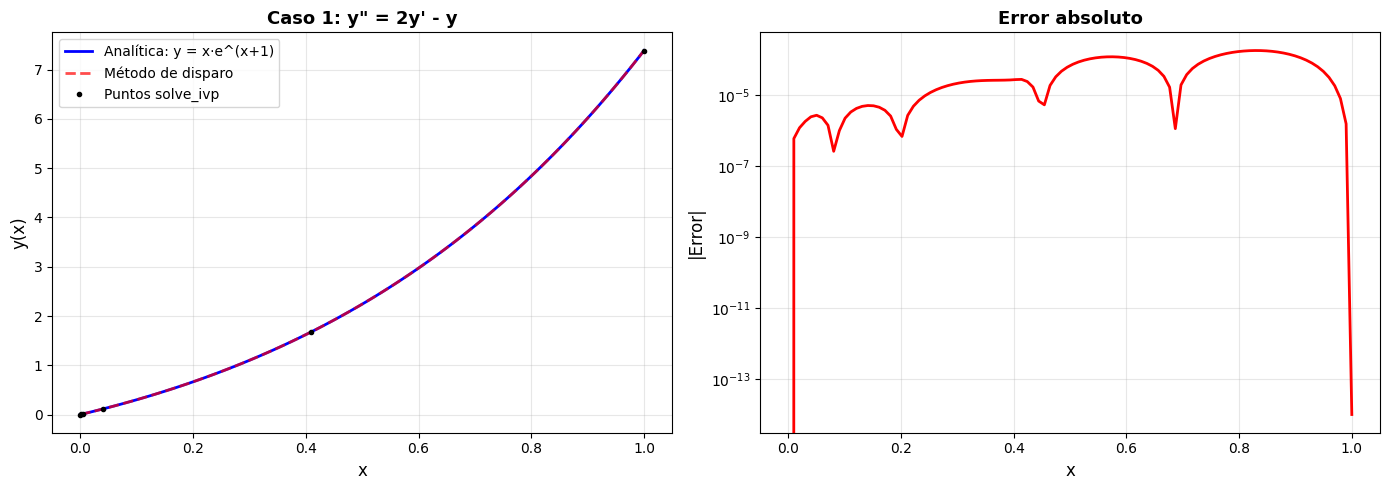

Error máximo: 1.86e-04

────────────────────────────────────────────────────────────────────────────────
CASO 2: Dato de comprobación 2
────────────────────────────────────────────────────────────────────────────────
Ecuación: y'' + 3xy·y' + 2y³ = 0,  0 ≤ x ≤ 1
Condiciones: y(0) = 1, y(1) = 1/2
Solución analítica: y(x) = 1/(1 + x²)

Pendiente obtenida: m = -0.0005505940439935918
Pendiente esperada: m ≈ 0.5851577873371666
Diferencia: 5.86e-01



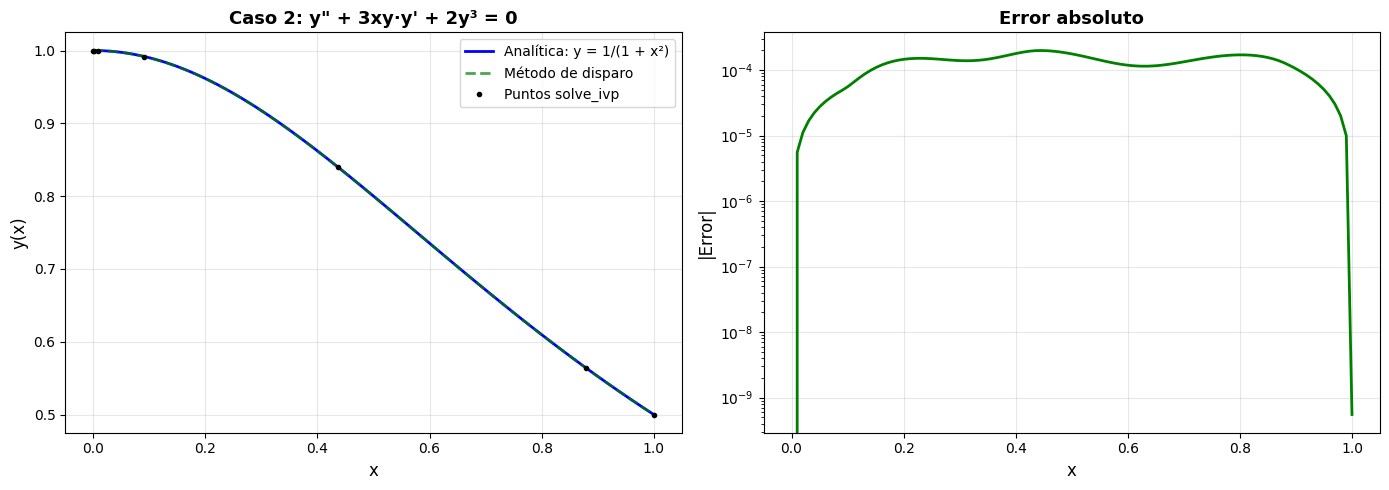

Error máximo: 1.99e-04

────────────────────────────────────────────────────────────────────────────────
CASO 3: Problema lineal de segundo orden
────────────────────────────────────────────────────────────────────────────────
Ecuación: y''(x) + 4y = 0,  0 ≤ x ≤ π/4
Condiciones: y(0) = 0, y(π/4) = 1
Solución analítica: y(x) = sin(2x)

Pendiente obtenida: m = 2.0000721895840585
Pendiente analítica: m = 2 (ya que y'(0) = 2·cos(0) = 2)
Diferencia: 7.22e-05



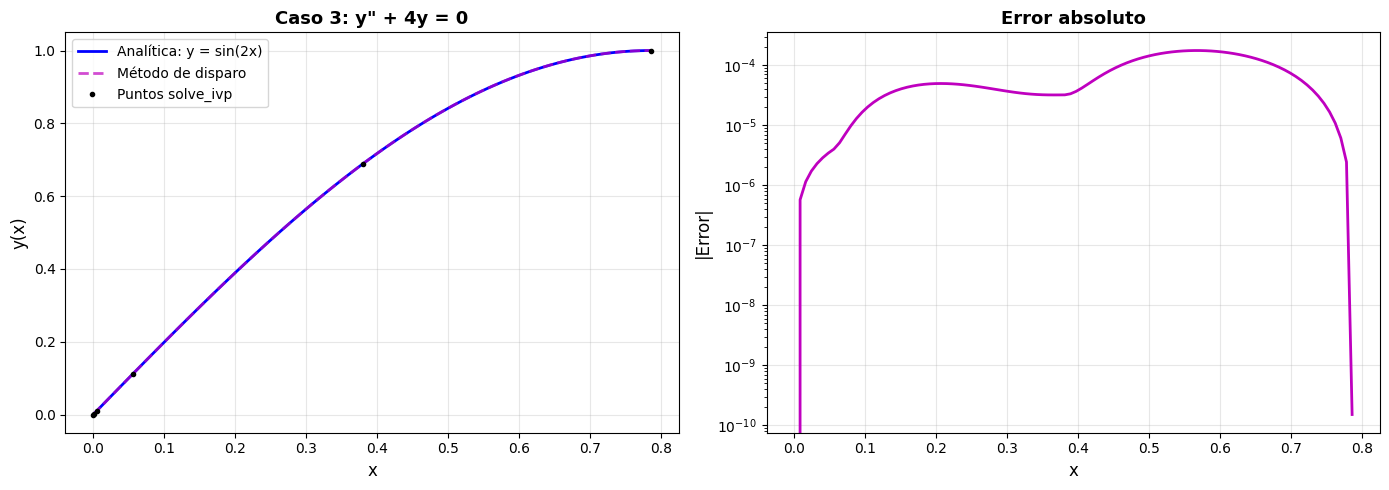

Error máximo: 1.75e-04

               ✓ VALIDACIÓN DEL MÉTODO DE DISPARO COMPLETADA


In [21]:
# ==================== PRUEBA Y VALIDACIÓN: MÉTODO DE DISPARO ====================
print("="*80)
print(" " * 20 + "VALIDACIÓN: MÉTODO DE DISPARO")
print("="*80 + "\n")

# --------------- CASO 1: Dato de comprobación 1 ---------------
print("─" * 80)
print("CASO 1: Dato de comprobación 1")
print("─" * 80)
print("Ecuación: y''(x) = 2y' - y,  0 ≤ x ≤ 1")
print("Condiciones: y(0) = 0, y(1) = e²")
print("Solución analítica: y(x) = x·e^(x+1)\n")

# Definir el sistema de primer orden: Y = [y, y']
# dy/dx = y'
# dy'/dx = 2y' - y
def F_caso1(x, Y):
    return [Y[1], 2*Y[1] - Y[0]]

# Resolver con método de disparo (valores por defecto)
sol_caso1 = disparo(F_caso1, [0, 1], [0, np.e**2], dense_output=True)

# Calcular la pendiente obtenida
m_obtenida_1 = sol_caso1.y[1, 0]
print(f"Pendiente obtenida: m = {m_obtenida_1}")
print(f"Pendiente esperada: m ≈ 2.718222404450188")
print(f"Diferencia: {abs(m_obtenida_1 - 2.718222404450188):.2e}\n")

# Solución analítica
x_eval = np.linspace(0, 1, 100)
y_analitica = x_eval * np.exp(x_eval + 1)

# Solución numérica interpolada
y_numerica = sol_caso1.sol(x_eval)[0]
error_1 = np.abs(y_numerica - y_analitica)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subfigura 1: Comparación con solución analítica
axes[0].plot(x_eval, y_analitica, 'b-', label='Analítica: y = x·e^(x+1)', linewidth=2)
axes[0].plot(x_eval, y_numerica, 'r--', linewidth=2, label='Método de disparo', alpha=0.7)
axes[0].plot(sol_caso1.t, sol_caso1.y[0], 'ko', markersize=3, label='Puntos solve_ivp')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y(x)', fontsize=12)
axes[0].set_title('Caso 1: y" = 2y\' - y', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subfigura 2: Error absoluto
axes[1].semilogy(x_eval, error_1, 'r-', linewidth=2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('|Error|', fontsize=12)
axes[1].set_title('Error absoluto', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Error máximo: {np.max(error_1):.2e}\n")

# --------------- CASO 2: Dato de comprobación 2 ---------------
print("─" * 80)
print("CASO 2: Dato de comprobación 2")
print("─" * 80)
print("Ecuación: y'' + 3xy·y' + 2y³ = 0,  0 ≤ x ≤ 1")
print("Condiciones: y(0) = 1, y(1) = 1/2")
print("Solución analítica: y(x) = 1/(1 + x²)\n")

# Definir el sistema de primer orden: Y = [y, y']
# dy/dx = y'
# dy'/dx = -3xy·y' - 2y³
def F_caso2(x, Y):
    return [Y[1], -3*x*Y[0]*Y[1] - 2*Y[0]**3]

# Resolver con método de disparo (valores por defecto)
sol_caso2 = disparo(F_caso2, [0, 1], [1, 0.5], dense_output=True)

# Calcular la pendiente obtenida
m_obtenida_2 = sol_caso2.y[1, 0]
print(f"Pendiente obtenida: m = {m_obtenida_2}")
print(f"Pendiente esperada: m ≈ 0.5851577873371666")
print(f"Diferencia: {abs(m_obtenida_2 - 0.5851577873371666):.2e}\n")

# Solución analítica
y_analitica_2 = 1 / (1 + x_eval**2)

# Solución numérica interpolada
y_numerica_2 = sol_caso2.sol(x_eval)[0]
error_2 = np.abs(y_numerica_2 - y_analitica_2)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subfigura 1: Comparación con solución analítica
axes[0].plot(x_eval, y_analitica_2, 'b-', label='Analítica: y = 1/(1 + x²)', linewidth=2)
axes[0].plot(x_eval, y_numerica_2, 'g--', linewidth=2, label='Método de disparo', alpha=0.7)
axes[0].plot(sol_caso2.t, sol_caso2.y[0], 'ko', markersize=3, label='Puntos solve_ivp')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y(x)', fontsize=12)
axes[0].set_title('Caso 2: y" + 3xy·y\' + 2y³ = 0', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Subfigura 2: Error absoluto
axes[1].semilogy(x_eval, error_2, 'g-', linewidth=2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('|Error|', fontsize=12)
axes[1].set_title('Error absoluto', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Error máximo: {np.max(error_2):.2e}\n")

# --------------- CASO 3: Problema adicional (lineal no homogéneo) ---------------
print("─" * 80)
print("CASO 3: Problema lineal de segundo orden")
print("─" * 80)
print("Ecuación: y''(x) + 4y = 0,  0 ≤ x ≤ π/4")
print("Condiciones: y(0) = 0, y(π/4) = 1")
print("Solución analítica: y(x) = sin(2x)\n")

def F_caso3(x, Y):
    return [Y[1], -4*Y[0]]

sol_caso3 = disparo(F_caso3, [0, np.pi/4], [0, 1], mi=[0, 2], dense_output=True)

# Calcular la pendiente obtenida
m_obtenida_3 = sol_caso3.y[1, 0]
print(f"Pendiente obtenida: m = {m_obtenida_3}")
print(f"Pendiente analítica: m = 2 (ya que y'(0) = 2·cos(0) = 2)")
print(f"Diferencia: {abs(m_obtenida_3 - 2):.2e}\n")

# Solución analítica
x_eval_3 = np.linspace(0, np.pi/4, 100)
y_analitica_3 = np.sin(2*x_eval_3)

# Solución numérica
y_numerica_3 = sol_caso3.sol(x_eval_3)[0]
error_3 = np.abs(y_numerica_3 - y_analitica_3)

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(x_eval_3, y_analitica_3, 'b-', label='Analítica: y = sin(2x)', linewidth=2)
axes[0].plot(x_eval_3, y_numerica_3, 'm--', linewidth=2, label='Método de disparo', alpha=0.7)
axes[0].plot(sol_caso3.t, sol_caso3.y[0], 'ko', markersize=3, label='Puntos solve_ivp')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('y(x)', fontsize=12)
axes[0].set_title('Caso 3: y" + 4y = 0', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].semilogy(x_eval_3, error_3, 'm-', linewidth=2)
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('|Error|', fontsize=12)
axes[1].set_title('Error absoluto', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Error máximo: {np.max(error_3):.2e}\n")

print("="*80)
print(" " * 15 + "✓ VALIDACIÓN DEL MÉTODO DE DISPARO COMPLETADA")
print("="*80)



---

## 📚 Referencias y Recursos Adicionales

<div style="background-color: #f5f5f5; padding: 20px; border-radius: 5px; margin: 15px 0;">

### 📖 Bibliografía Recomendada

#### Libros Fundamentales

1. **Burden, R. L., & Faires, J. D.** (2010). *Numerical Analysis* (9th ed.). Brooks/Cole.
   - Capítulo 3: Interpolación y Aproximación Polinomial
   - Capítulo 4: Diferenciación e Integración Numérica
   - Capítulo 5: Solución Numérica de Ecuaciones Diferenciales

2. **Quarteroni, A., Sacco, R., & Saleri, F.** (2007). *Numerical Mathematics* (2nd ed.). Springer.
   - Sección 4.2: Interpolación de Lagrange y Tchebishev
   - Sección 8: Integración Numérica
   - Sección 9: Métodos de Extrapolación

3. **Atkinson, K. E.** (1989). *An Introduction to Numerical Analysis* (2nd ed.). Wiley.
   - Capítulo 3: Interpolación Polinomial
   - Capítulo 4: Aproximación de Funciones
   - Capítulo 5: Diferenciación e Integración Numérica

4. **Heath, M. T.** (2018). *Scientific Computing: An Introductory Survey* (3rd ed.). SIAM.
   - Capítulo 7: Interpolación
   - Capítulo 8: Integración Numérica
   - Tratamiento moderno con enfoque computacional

5. **Press, W. H., Teukolsky, S. A., Vetterling, W. T., & Flannery, B. P.** (2007). 
   *Numerical Recipes: The Art of Scientific Computing* (3rd ed.). Cambridge University Press.
   - Capítulo 3: Interpolación y Extrapolación
   - Capítulo 4: Integración de Funciones
   - Código práctico y explicaciones detalladas

#### Recursos Especializados

6. **Trefethen, L. N.** (2013). *Approximation Theory and Approximation Practice*. SIAM.
   - Teoría avanzada de aproximación con polinomios de Tchebishev
   - Enfoque en análisis numérico moderno

7. **Stoer, J., & Bulirsch, R.** (2002). *Introduction to Numerical Analysis* (3rd ed.). Springer.
   - Tratamiento riguroso de extrapolación de Richardson
   - Método de Romberg y técnicas avanzadas

### 🔗 Recursos en Línea

#### Documentación de Bibliotecas

- **[NumPy Documentation](https://numpy.org/doc/)** - Documentación oficial de NumPy
  - Tutorial de polinomios: `numpy.polynomial`
  - Operaciones vectoriales y matrices

- **[Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html)** - Galería de ejemplos de visualización
  - Gráficas científicas y personalizadas
  - Ejemplos de uso avanzado

- **[SciPy Interpolation](https://docs.scipy.org/doc/scipy/reference/interpolate.html)** - Módulo de interpolación de SciPy
  - `scipy.interpolate.lagrange`: Interpolación de Lagrange
  - `scipy.interpolate.CubicSpline`: Splines cúbicas
  - `scipy.integrate.romberg`: Integración de Romberg

- **[SymPy Documentation](https://docs.sympy.org/)** - Biblioteca de matemáticas simbólicas
  - Cálculo simbólico de derivadas e integrales
  - Verificación analítica de resultados

#### Tutoriales y Cursos

- **[Real Python - NumPy Tutorial](https://realpython.com/numpy-tutorial/)** - Tutorial completo de NumPy
- **[Scipy Lecture Notes](https://scipy-lectures.org/)** - Curso completo de Python científico
- **[Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)** - Libro online gratuito

#### Recursos Académicos

- **[MIT OpenCourseWare - Numerical Methods](https://ocw.mit.edu/)** - Cursos gratuitos del MIT
- **[Wolfram MathWorld](https://mathworld.wolfram.com/)** - Enciclopedia matemática
  - Artículos sobre interpolación, diferenciación e integración numérica

### 💡 Conceptos Clave

<table style="width:100%; border-collapse: collapse; background-color: white;">
<tr style="background-color: #e3f2fd;">
<th style="padding: 12px; border: 1px solid #ddd; text-align: left; width: 25%;">Concepto</th>
<th style="padding: 12px; border: 1px solid #ddd; text-align: left;">Descripción</th>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Interpolación de Lagrange</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Construcción de polinomios que pasan exactamente por puntos dados usando una base de polinomios $L_k(x)$ con la propiedad $L_k(x_j) = \delta_{kj}$</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Nodos de Tchebishev</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Puntos óptimos $x_k = \cos(\frac{(2k+1)\pi}{2n})$ en $[-1,1]$ que minimizan el error de interpolación y evitan el fenómeno de Runge</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Fenómeno de Runge</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Oscilaciones indeseadas cerca de los extremos del intervalo al usar nodos equiespaciados, que aumentan con el grado del polinomio</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Partición de la unidad</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Propiedad fundamental: $\sum_{k=0}^{n-1} L_k(x) = 1, \forall x \in \mathbb{R}$ que garantiza la interpolación exacta</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Interpolación paramétrica</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Representación de curvas mediante parametrización $\mathbf{r}(u) = (x(u), y(u))$ usando splines cúbicas para mayor suavidad</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Splines cúbicas</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Polinomios a trozos de grado 3 con continuidad $C^2$ en los nodos, minimizando la curvatura total de la curva</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Derivación numérica</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Aproximación de derivadas mediante diferencias finitas: $f'(x) \approx [f(x+h)-f(x-h)]/(2h)$ con coeficientes derivados de la base de Lagrange</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Diferencias centradas</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Fórmulas de derivación numérica de mayor precisión ($\mathcal{O}(h^2)$ o superior) que utilizan puntos simétricos alrededor de $x$</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Error de truncamiento</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Error que disminuye con $h$ al aproximar derivadas: $\mathcal{O}(h^p)$ donde $p$ es el orden del método</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Error de redondeo</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Error de punto flotante que aumenta al reducir $h$: $\mathcal{O}(\epsilon/h^q)$ debido a la cancelación numérica</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Cancelación catastrófica</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Pérdida severa de precisión al restar números casi iguales, especialmente crítica con $h$ muy pequeño</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Valor óptimo de $h$</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Paso que minimiza el error total balanceando truncamiento y redondeo: $h_{opt} \approx (\epsilon/M)^{1/(p+q)}$</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Cuadratura numérica</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Aproximación de integrales mediante sumas ponderadas: $\int_a^b f(x)dx \approx \sum_{i=0}^{n} w_i f(x_i)$</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Regla del Trapecio</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Fórmula básica de integración con pesos $(1,1)$ y precisión $\mathcal{O}(h^2)$: aproxima el área con trapecios</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Regla de Simpson</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Fórmula de integración con pesos $(1,4,1)$ y precisión $\mathcal{O}(h^4)$: usa parábolas para aproximar</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Método de Romberg</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Extrapolación de Richardson aplicada al trapecio compuesto para obtener orden $\mathcal{O}(h^{2m})$ mediante tabla triangular</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Extrapolación de Richardson</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Técnica de combinación lineal de aproximaciones: $R_{k,j} = R_{k,j-1} + \frac{R_{k,j-1} - R_{k-1,j-1}}{4^j - 1}$</td>
</tr>
<tr style="background-color: #f9f9f9;">
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Grado de precisión</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Máximo grado de polinomio que una regla de cuadratura integra exactamente sin error</td>
</tr>
<tr>
<td style="padding: 10px; border: 1px solid #ddd;"><strong>Convergencia espectral</strong></td>
<td style="padding: 10px; border: 1px solid #ddd;">Convergencia exponencialmente rápida (más rápida que cualquier potencia de $h$) para funciones analíticas</td>
</tr>
</table>

### 🎯 Aplicaciones Prácticas

<div style="background-color: #fff3e0; padding: 15px; border-left: 4px solid #ff9800; margin: 10px 0;">

#### Interpolación
- Reconstrucción de señales en procesamiento digital
- Animación y gráficos por computadora (curvas suaves)
- Modelado de trayectorias en física y robótica

#### Derivación Numérica
- Cálculo de velocidades y aceleraciones a partir de datos de posición
- Análisis de tasas de cambio en experimentos
- Gradientes para optimización y aprendizaje automático

#### Integración Numérica
- Cálculo de áreas, volúmenes y centroides
- Evaluación de integrales sin solución analítica
- Física computacional (trabajo, energía, flujos)
- Estadística (funciones de distribución)

</div>

### 🛠️ Herramientas de Software

<table style="width:100%; border-collapse: collapse;">
<tr style="background-color: #e8f5e9;">
<th style="padding: 10px; border: 1px solid #ddd;">Herramienta</th>
<th style="padding: 10px; border: 1px solid #ddd;">Uso Principal</th>
<th style="padding: 10px; border: 1px solid #ddd;">Ventajas</th>
</tr>
<tr>
<td style="padding: 8px; border: 1px solid #ddd;"><strong>NumPy</strong></td>
<td style="padding: 8px; border: 1px solid #ddd;">Cálculo numérico y álgebra lineal</td>
<td style="padding: 8px; border: 1px solid #ddd;">Rápido, eficiente, base del ecosistema científico</td>
</tr>
<tr>
<td style="padding: 8px; border: 1px solid #ddd;"><strong>SciPy</strong></td>
<td style="padding: 8px; border: 1px solid #ddd;">Algoritmos científicos especializados</td>
<td style="padding: 8px; border: 1px solid #ddd;">Implementaciones optimizadas y validadas</td>
</tr>
<tr>
<td style="padding: 8px; border: 1px solid #ddd;"><strong>Matplotlib</strong></td>
<td style="padding: 8px; border: 1px solid #ddd;">Visualización de datos</td>
<td style="padding: 8px; border: 1px solid #ddd;">Flexible, calidad de publicación</td>
</tr>
<tr>
<td style="padding: 8px; border: 1px solid #ddd;"><strong>SymPy</strong></td>
<td style="padding: 8px; border: 1px solid #ddd;">Matemática simbólica</td>
<td style="padding: 8px; border: 1px solid #ddd;">Soluciones exactas, verificación analítica</td>
</tr>
<tr>
<td style="padding: 8px; border: 1px solid #ddd;"><strong>Jupyter</strong></td>
<td style="padding: 8px; border: 1px solid #ddd;">Desarrollo interactivo</td>
<td style="padding: 8px; border: 1px solid #ddd;">Narrativo, reproducible, colaborativo</td>
</tr>
</table>

### 📝 Notas sobre Implementación

<div style="background-color: #e3f2fd; padding: 15px; border-left: 4px solid #2196f3; margin: 10px 0;">

**Buenas prácticas:**
- ✓ Validar siempre con casos conocidos antes de usar en problemas reales
- ✓ Comparar diferentes métodos para verificar consistencia
- ✓ Analizar la convergencia y estimar errores
- ✓ Documentar claramente las hipótesis y limitaciones
- ✓ Usar vectorización de NumPy para mejor rendimiento

**Advertencias:**
- ⚠️ No usar nodos equiespaciados para interpolación de alto grado
- ⚠️ Cuidado con la cancelación numérica en derivación con $h$ muy pequeño
- ⚠️ Verificar que las funciones sean suficientemente suaves
- ⚠️ El método de Romberg puede fallar con funciones oscilatorias
- ⚠️ Siempre verificar la convergencia en integración adaptativa

</div>

</div>

---

<h3 align="center">💻 Desarrollado con</h3>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

![Python](https://img.shields.io/badge/Python-3776AB?style=flat&logo=python&logoColor=white)
![NumPy](https://img.shields.io/badge/NumPy-013243?style=flat&logo=numpy&logoColor=white)
![Matplotlib](https://img.shields.io/badge/Matplotlib-11557c?style=flat&logo=plotly&logoColor=white)
![Jupyter](https://img.shields.io/badge/Jupyter-F37626?style=flat&logo=jupyter&logoColor=white)

</td>
</tr>
</table>

---

<p align="center"><strong>Métodos Numéricos y Análisis Funcional 2025</strong></p>

<p align="center"><em>Última actualización: Noviembre 2025</em></p>

<table align="center" style="border: none;">
<tr>
<td align="center" style="border: none;">

[![GitHub](https://img.shields.io/badge/GitHub-Repository-181717?style=flat&logo=github)](https://github.com)
[![License](https://img.shields.io/badge/License-MIT-yellow?style=flat)](LICENSE)

</td>
</tr>
</table>

</div>